In [1]:
lr = 1e-4
bs = 32
val_split = 0.80
num_epochs = 10
num_classes = 2
MOMENTUM = 0.9
epochs = 10

In [2]:
import gc
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils import data
import numpy as np
import torchvision
from  numpy import exp, absolute, asarray
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import time, os, json, random, gc, copy, math, multiprocessing
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score,f1_score,precision_score ,recall_score 
from PIL import Image
from pathlib import Path

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
tr_dir = str(Path().resolve().parent.parent.parent) + "/Datasets/Benchmark/PanEtAl/full/"
ho_dir = str(Path().resolve().parent.parent.parent) + "/Datasets/Benchmark/PanEtAl/HO/"

In [4]:
train_transforms = transforms.Compose([transforms.ToTensor()])
ho_transforms = transforms.Compose([transforms.ToTensor()])
train_data = datasets.ImageFolder(tr_dir, transform=train_transforms)
ho_data = datasets.ImageFolder(ho_dir, transform=ho_transforms)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=bs, shuffle=True)
holoader = torch.utils.data.DataLoader(ho_data, batch_size=bs)
print(train_data.class_to_idx)
print(ho_data.class_to_idx)

{'neg_sub': 0, 'pos_sub': 1}
{'neg_sub': 0, 'pos_sub': 1}


In [5]:
print(trainloader.dataset.classes)
print(holoader.dataset.classes)

['neg_sub', 'pos_sub']
['neg_sub', 'pos_sub']


In [6]:
model = torchvision.models.densenet201()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=MOMENTUM)
model.classifier = nn.Linear(in_features = model.classifier.in_features, out_features = num_classes)
model = model.to(device)

In [7]:
print(model.classifier.in_features)

1920


In [8]:
steps = 0
running_loss = 0
print_every = 100
for epoch in range(epochs):
    for inputs, labels in trainloader:
        steps += 1
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if steps % print_every == 0:          
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}")
            running_loss = 0
torch.save(model, 'finalmodel-full.pth')

Epoch 1/10.. Train loss: 0.698
Epoch 1/10.. Train loss: 0.699
Epoch 1/10.. Train loss: 0.697
Epoch 1/10.. Train loss: 0.694
Epoch 1/10.. Train loss: 0.693
Epoch 1/10.. Train loss: 0.693
Epoch 1/10.. Train loss: 0.691
Epoch 1/10.. Train loss: 0.693
Epoch 1/10.. Train loss: 0.689
Epoch 1/10.. Train loss: 0.686
Epoch 1/10.. Train loss: 0.688
Epoch 1/10.. Train loss: 0.688
Epoch 1/10.. Train loss: 0.689
Epoch 1/10.. Train loss: 0.686
Epoch 1/10.. Train loss: 0.687
Epoch 1/10.. Train loss: 0.689
Epoch 1/10.. Train loss: 0.685
Epoch 1/10.. Train loss: 0.690
Epoch 1/10.. Train loss: 0.688
Epoch 1/10.. Train loss: 0.685
Epoch 1/10.. Train loss: 0.688
Epoch 1/10.. Train loss: 0.685
Epoch 1/10.. Train loss: 0.683
Epoch 1/10.. Train loss: 0.684
Epoch 1/10.. Train loss: 0.684
Epoch 1/10.. Train loss: 0.681
Epoch 1/10.. Train loss: 0.681
Epoch 1/10.. Train loss: 0.684
Epoch 1/10.. Train loss: 0.681
Epoch 1/10.. Train loss: 0.681
Epoch 1/10.. Train loss: 0.679
Epoch 1/10.. Train loss: 0.683
Epoch 1/

Epoch 1/10.. Train loss: 0.619
Epoch 1/10.. Train loss: 0.613
Epoch 1/10.. Train loss: 0.621
Epoch 1/10.. Train loss: 0.618
Epoch 1/10.. Train loss: 0.632
Epoch 1/10.. Train loss: 0.625
Epoch 1/10.. Train loss: 0.619
Epoch 1/10.. Train loss: 0.618
Epoch 1/10.. Train loss: 0.614
Epoch 1/10.. Train loss: 0.614
Epoch 1/10.. Train loss: 0.616
Epoch 1/10.. Train loss: 0.616
Epoch 1/10.. Train loss: 0.625
Epoch 1/10.. Train loss: 0.624
Epoch 1/10.. Train loss: 0.615
Epoch 1/10.. Train loss: 0.616
Epoch 1/10.. Train loss: 0.618
Epoch 1/10.. Train loss: 0.619
Epoch 1/10.. Train loss: 0.615
Epoch 1/10.. Train loss: 0.614
Epoch 1/10.. Train loss: 0.613
Epoch 1/10.. Train loss: 0.614
Epoch 1/10.. Train loss: 0.612
Epoch 1/10.. Train loss: 0.615
Epoch 1/10.. Train loss: 0.618
Epoch 1/10.. Train loss: 0.616
Epoch 1/10.. Train loss: 0.611
Epoch 1/10.. Train loss: 0.617
Epoch 1/10.. Train loss: 0.620
Epoch 1/10.. Train loss: 0.619
Epoch 1/10.. Train loss: 0.607
Epoch 1/10.. Train loss: 0.611
Epoch 1/

Epoch 1/10.. Train loss: 0.451
Epoch 1/10.. Train loss: 0.446
Epoch 1/10.. Train loss: 0.437
Epoch 1/10.. Train loss: 0.441
Epoch 1/10.. Train loss: 0.452
Epoch 1/10.. Train loss: 0.424
Epoch 1/10.. Train loss: 0.439
Epoch 1/10.. Train loss: 0.430
Epoch 1/10.. Train loss: 0.437
Epoch 1/10.. Train loss: 0.441
Epoch 1/10.. Train loss: 0.437
Epoch 1/10.. Train loss: 0.436
Epoch 1/10.. Train loss: 0.442
Epoch 1/10.. Train loss: 0.423
Epoch 1/10.. Train loss: 0.420
Epoch 1/10.. Train loss: 0.441
Epoch 1/10.. Train loss: 0.419
Epoch 1/10.. Train loss: 0.421
Epoch 1/10.. Train loss: 0.422
Epoch 1/10.. Train loss: 0.424
Epoch 1/10.. Train loss: 0.428
Epoch 1/10.. Train loss: 0.435
Epoch 1/10.. Train loss: 0.416
Epoch 1/10.. Train loss: 0.419
Epoch 1/10.. Train loss: 0.422
Epoch 1/10.. Train loss: 0.412
Epoch 1/10.. Train loss: 0.396
Epoch 1/10.. Train loss: 0.415
Epoch 1/10.. Train loss: 0.408
Epoch 1/10.. Train loss: 0.413
Epoch 1/10.. Train loss: 0.414
Epoch 1/10.. Train loss: 0.421
Epoch 1/

Epoch 1/10.. Train loss: 0.213
Epoch 1/10.. Train loss: 0.215
Epoch 1/10.. Train loss: 0.200
Epoch 1/10.. Train loss: 0.218
Epoch 1/10.. Train loss: 0.207
Epoch 1/10.. Train loss: 0.213
Epoch 1/10.. Train loss: 0.201
Epoch 1/10.. Train loss: 0.209
Epoch 1/10.. Train loss: 0.241
Epoch 1/10.. Train loss: 0.218
Epoch 1/10.. Train loss: 0.205
Epoch 1/10.. Train loss: 0.204
Epoch 1/10.. Train loss: 0.207
Epoch 1/10.. Train loss: 0.220
Epoch 1/10.. Train loss: 0.208
Epoch 1/10.. Train loss: 0.202
Epoch 1/10.. Train loss: 0.204
Epoch 1/10.. Train loss: 0.185
Epoch 1/10.. Train loss: 0.212
Epoch 1/10.. Train loss: 0.222
Epoch 1/10.. Train loss: 0.204
Epoch 1/10.. Train loss: 0.199
Epoch 1/10.. Train loss: 0.190
Epoch 1/10.. Train loss: 0.208
Epoch 1/10.. Train loss: 0.198
Epoch 1/10.. Train loss: 0.217
Epoch 1/10.. Train loss: 0.197
Epoch 1/10.. Train loss: 0.200
Epoch 1/10.. Train loss: 0.199
Epoch 1/10.. Train loss: 0.195
Epoch 1/10.. Train loss: 0.196
Epoch 1/10.. Train loss: 0.193
Epoch 1/

Epoch 1/10.. Train loss: 0.142
Epoch 1/10.. Train loss: 0.152
Epoch 1/10.. Train loss: 0.146
Epoch 1/10.. Train loss: 0.138
Epoch 1/10.. Train loss: 0.145
Epoch 1/10.. Train loss: 0.136
Epoch 1/10.. Train loss: 0.146
Epoch 1/10.. Train loss: 0.139
Epoch 1/10.. Train loss: 0.135
Epoch 1/10.. Train loss: 0.132
Epoch 1/10.. Train loss: 0.135
Epoch 1/10.. Train loss: 0.148
Epoch 1/10.. Train loss: 0.146
Epoch 1/10.. Train loss: 0.123
Epoch 1/10.. Train loss: 0.154
Epoch 1/10.. Train loss: 0.134
Epoch 1/10.. Train loss: 0.146
Epoch 1/10.. Train loss: 0.135
Epoch 1/10.. Train loss: 0.126
Epoch 1/10.. Train loss: 0.146
Epoch 1/10.. Train loss: 0.144
Epoch 1/10.. Train loss: 0.148
Epoch 1/10.. Train loss: 0.145
Epoch 1/10.. Train loss: 0.135
Epoch 1/10.. Train loss: 0.143
Epoch 1/10.. Train loss: 0.138
Epoch 1/10.. Train loss: 0.132
Epoch 1/10.. Train loss: 0.127
Epoch 1/10.. Train loss: 0.153
Epoch 1/10.. Train loss: 0.130
Epoch 1/10.. Train loss: 0.138
Epoch 1/10.. Train loss: 0.140
Epoch 1/

Epoch 1/10.. Train loss: 0.115
Epoch 1/10.. Train loss: 0.118
Epoch 1/10.. Train loss: 0.103
Epoch 1/10.. Train loss: 0.108
Epoch 1/10.. Train loss: 0.108
Epoch 1/10.. Train loss: 0.120
Epoch 1/10.. Train loss: 0.123
Epoch 1/10.. Train loss: 0.142
Epoch 1/10.. Train loss: 0.128
Epoch 1/10.. Train loss: 0.124
Epoch 1/10.. Train loss: 0.120
Epoch 1/10.. Train loss: 0.102
Epoch 1/10.. Train loss: 0.117
Epoch 1/10.. Train loss: 0.110
Epoch 1/10.. Train loss: 0.114
Epoch 1/10.. Train loss: 0.115
Epoch 1/10.. Train loss: 0.116
Epoch 1/10.. Train loss: 0.116
Epoch 1/10.. Train loss: 0.108
Epoch 1/10.. Train loss: 0.105
Epoch 1/10.. Train loss: 0.123
Epoch 1/10.. Train loss: 0.108
Epoch 1/10.. Train loss: 0.122
Epoch 1/10.. Train loss: 0.119
Epoch 1/10.. Train loss: 0.122
Epoch 1/10.. Train loss: 0.130
Epoch 1/10.. Train loss: 0.104
Epoch 1/10.. Train loss: 0.102
Epoch 1/10.. Train loss: 0.128
Epoch 1/10.. Train loss: 0.108
Epoch 1/10.. Train loss: 0.125
Epoch 1/10.. Train loss: 0.128
Epoch 1/

Epoch 1/10.. Train loss: 0.106
Epoch 1/10.. Train loss: 0.111
Epoch 1/10.. Train loss: 0.101
Epoch 1/10.. Train loss: 0.112
Epoch 1/10.. Train loss: 0.113
Epoch 1/10.. Train loss: 0.107
Epoch 1/10.. Train loss: 0.096
Epoch 1/10.. Train loss: 0.109
Epoch 1/10.. Train loss: 0.120
Epoch 1/10.. Train loss: 0.096
Epoch 1/10.. Train loss: 0.118
Epoch 1/10.. Train loss: 0.094
Epoch 1/10.. Train loss: 0.118
Epoch 1/10.. Train loss: 0.108
Epoch 1/10.. Train loss: 0.100
Epoch 1/10.. Train loss: 0.093
Epoch 1/10.. Train loss: 0.099
Epoch 1/10.. Train loss: 0.095
Epoch 1/10.. Train loss: 0.106
Epoch 1/10.. Train loss: 0.098
Epoch 1/10.. Train loss: 0.102
Epoch 1/10.. Train loss: 0.112
Epoch 1/10.. Train loss: 0.119
Epoch 1/10.. Train loss: 0.094
Epoch 1/10.. Train loss: 0.118
Epoch 1/10.. Train loss: 0.095
Epoch 1/10.. Train loss: 0.110
Epoch 1/10.. Train loss: 0.106
Epoch 1/10.. Train loss: 0.100
Epoch 1/10.. Train loss: 0.111
Epoch 1/10.. Train loss: 0.105
Epoch 1/10.. Train loss: 0.108
Epoch 1/

Epoch 2/10.. Train loss: 0.105
Epoch 2/10.. Train loss: 0.094
Epoch 2/10.. Train loss: 0.100
Epoch 2/10.. Train loss: 0.108
Epoch 2/10.. Train loss: 0.092
Epoch 2/10.. Train loss: 0.099
Epoch 2/10.. Train loss: 0.101
Epoch 2/10.. Train loss: 0.093
Epoch 2/10.. Train loss: 0.097
Epoch 2/10.. Train loss: 0.095
Epoch 2/10.. Train loss: 0.094
Epoch 2/10.. Train loss: 0.102
Epoch 2/10.. Train loss: 0.096
Epoch 2/10.. Train loss: 0.085
Epoch 2/10.. Train loss: 0.088
Epoch 2/10.. Train loss: 0.090
Epoch 2/10.. Train loss: 0.088
Epoch 2/10.. Train loss: 0.089
Epoch 2/10.. Train loss: 0.106
Epoch 2/10.. Train loss: 0.105
Epoch 2/10.. Train loss: 0.112
Epoch 2/10.. Train loss: 0.085
Epoch 2/10.. Train loss: 0.094
Epoch 2/10.. Train loss: 0.098
Epoch 2/10.. Train loss: 0.089
Epoch 2/10.. Train loss: 0.088
Epoch 2/10.. Train loss: 0.088
Epoch 2/10.. Train loss: 0.095
Epoch 2/10.. Train loss: 0.092
Epoch 2/10.. Train loss: 0.110
Epoch 2/10.. Train loss: 0.107
Epoch 2/10.. Train loss: 0.090
Epoch 2/

Epoch 2/10.. Train loss: 0.098
Epoch 2/10.. Train loss: 0.085
Epoch 2/10.. Train loss: 0.092
Epoch 2/10.. Train loss: 0.091
Epoch 2/10.. Train loss: 0.088
Epoch 2/10.. Train loss: 0.103
Epoch 2/10.. Train loss: 0.097
Epoch 2/10.. Train loss: 0.088
Epoch 2/10.. Train loss: 0.090
Epoch 2/10.. Train loss: 0.097
Epoch 2/10.. Train loss: 0.089
Epoch 2/10.. Train loss: 0.082
Epoch 2/10.. Train loss: 0.092
Epoch 2/10.. Train loss: 0.085
Epoch 2/10.. Train loss: 0.078
Epoch 2/10.. Train loss: 0.088
Epoch 2/10.. Train loss: 0.082
Epoch 2/10.. Train loss: 0.092
Epoch 2/10.. Train loss: 0.088
Epoch 2/10.. Train loss: 0.101
Epoch 2/10.. Train loss: 0.094
Epoch 2/10.. Train loss: 0.094
Epoch 2/10.. Train loss: 0.095
Epoch 2/10.. Train loss: 0.086
Epoch 2/10.. Train loss: 0.094
Epoch 2/10.. Train loss: 0.093
Epoch 2/10.. Train loss: 0.107
Epoch 2/10.. Train loss: 0.095
Epoch 2/10.. Train loss: 0.101
Epoch 2/10.. Train loss: 0.096
Epoch 2/10.. Train loss: 0.088
Epoch 2/10.. Train loss: 0.097
Epoch 2/

Epoch 2/10.. Train loss: 0.080
Epoch 2/10.. Train loss: 0.086
Epoch 2/10.. Train loss: 0.073
Epoch 2/10.. Train loss: 0.079
Epoch 2/10.. Train loss: 0.089
Epoch 2/10.. Train loss: 0.095
Epoch 2/10.. Train loss: 0.091
Epoch 2/10.. Train loss: 0.071
Epoch 2/10.. Train loss: 0.091
Epoch 2/10.. Train loss: 0.075
Epoch 2/10.. Train loss: 0.080
Epoch 2/10.. Train loss: 0.080
Epoch 2/10.. Train loss: 0.109
Epoch 2/10.. Train loss: 0.099
Epoch 2/10.. Train loss: 0.094
Epoch 2/10.. Train loss: 0.098
Epoch 2/10.. Train loss: 0.093
Epoch 2/10.. Train loss: 0.097
Epoch 2/10.. Train loss: 0.087
Epoch 2/10.. Train loss: 0.082
Epoch 2/10.. Train loss: 0.094
Epoch 2/10.. Train loss: 0.091
Epoch 2/10.. Train loss: 0.089
Epoch 2/10.. Train loss: 0.094
Epoch 2/10.. Train loss: 0.090
Epoch 2/10.. Train loss: 0.104
Epoch 2/10.. Train loss: 0.084
Epoch 2/10.. Train loss: 0.091
Epoch 2/10.. Train loss: 0.074
Epoch 2/10.. Train loss: 0.086
Epoch 2/10.. Train loss: 0.114
Epoch 2/10.. Train loss: 0.095
Epoch 2/

Epoch 2/10.. Train loss: 0.089
Epoch 2/10.. Train loss: 0.086
Epoch 2/10.. Train loss: 0.085
Epoch 2/10.. Train loss: 0.081
Epoch 2/10.. Train loss: 0.076
Epoch 2/10.. Train loss: 0.098
Epoch 2/10.. Train loss: 0.090
Epoch 2/10.. Train loss: 0.098
Epoch 2/10.. Train loss: 0.092
Epoch 2/10.. Train loss: 0.083
Epoch 2/10.. Train loss: 0.086
Epoch 2/10.. Train loss: 0.094
Epoch 2/10.. Train loss: 0.079
Epoch 2/10.. Train loss: 0.092
Epoch 2/10.. Train loss: 0.086
Epoch 2/10.. Train loss: 0.080
Epoch 2/10.. Train loss: 0.097
Epoch 2/10.. Train loss: 0.085
Epoch 2/10.. Train loss: 0.069
Epoch 2/10.. Train loss: 0.094
Epoch 2/10.. Train loss: 0.090
Epoch 2/10.. Train loss: 0.085
Epoch 2/10.. Train loss: 0.085
Epoch 2/10.. Train loss: 0.087
Epoch 2/10.. Train loss: 0.077
Epoch 2/10.. Train loss: 0.068
Epoch 2/10.. Train loss: 0.085
Epoch 2/10.. Train loss: 0.083
Epoch 2/10.. Train loss: 0.093
Epoch 2/10.. Train loss: 0.068
Epoch 2/10.. Train loss: 0.099
Epoch 2/10.. Train loss: 0.089
Epoch 2/

Epoch 2/10.. Train loss: 0.104
Epoch 2/10.. Train loss: 0.078
Epoch 2/10.. Train loss: 0.092
Epoch 2/10.. Train loss: 0.089
Epoch 2/10.. Train loss: 0.073
Epoch 2/10.. Train loss: 0.087
Epoch 2/10.. Train loss: 0.094
Epoch 2/10.. Train loss: 0.082
Epoch 2/10.. Train loss: 0.079
Epoch 2/10.. Train loss: 0.101
Epoch 2/10.. Train loss: 0.084
Epoch 2/10.. Train loss: 0.083
Epoch 2/10.. Train loss: 0.070
Epoch 2/10.. Train loss: 0.088
Epoch 2/10.. Train loss: 0.090
Epoch 2/10.. Train loss: 0.107
Epoch 2/10.. Train loss: 0.077
Epoch 2/10.. Train loss: 0.090
Epoch 2/10.. Train loss: 0.093
Epoch 2/10.. Train loss: 0.099
Epoch 2/10.. Train loss: 0.088
Epoch 2/10.. Train loss: 0.095
Epoch 2/10.. Train loss: 0.080
Epoch 2/10.. Train loss: 0.080
Epoch 2/10.. Train loss: 0.085
Epoch 2/10.. Train loss: 0.084
Epoch 2/10.. Train loss: 0.094
Epoch 2/10.. Train loss: 0.073
Epoch 2/10.. Train loss: 0.082
Epoch 2/10.. Train loss: 0.078
Epoch 2/10.. Train loss: 0.091
Epoch 2/10.. Train loss: 0.079
Epoch 2/

Epoch 2/10.. Train loss: 0.087
Epoch 2/10.. Train loss: 0.096
Epoch 2/10.. Train loss: 0.084
Epoch 2/10.. Train loss: 0.095
Epoch 2/10.. Train loss: 0.085
Epoch 2/10.. Train loss: 0.065
Epoch 2/10.. Train loss: 0.084
Epoch 2/10.. Train loss: 0.096
Epoch 2/10.. Train loss: 0.078
Epoch 2/10.. Train loss: 0.084
Epoch 2/10.. Train loss: 0.086
Epoch 2/10.. Train loss: 0.081
Epoch 2/10.. Train loss: 0.081
Epoch 2/10.. Train loss: 0.085
Epoch 2/10.. Train loss: 0.083
Epoch 2/10.. Train loss: 0.084
Epoch 2/10.. Train loss: 0.083
Epoch 2/10.. Train loss: 0.078
Epoch 2/10.. Train loss: 0.086
Epoch 2/10.. Train loss: 0.067
Epoch 2/10.. Train loss: 0.079
Epoch 2/10.. Train loss: 0.072
Epoch 2/10.. Train loss: 0.079
Epoch 2/10.. Train loss: 0.076
Epoch 2/10.. Train loss: 0.080
Epoch 2/10.. Train loss: 0.084
Epoch 2/10.. Train loss: 0.092
Epoch 2/10.. Train loss: 0.067
Epoch 2/10.. Train loss: 0.072
Epoch 2/10.. Train loss: 0.087
Epoch 2/10.. Train loss: 0.092
Epoch 2/10.. Train loss: 0.079
Epoch 2/

Epoch 2/10.. Train loss: 0.083
Epoch 2/10.. Train loss: 0.081
Epoch 2/10.. Train loss: 0.078
Epoch 2/10.. Train loss: 0.095
Epoch 2/10.. Train loss: 0.068
Epoch 2/10.. Train loss: 0.092
Epoch 2/10.. Train loss: 0.083
Epoch 2/10.. Train loss: 0.076
Epoch 2/10.. Train loss: 0.073
Epoch 3/10.. Train loss: 0.073
Epoch 3/10.. Train loss: 0.084
Epoch 3/10.. Train loss: 0.074
Epoch 3/10.. Train loss: 0.078
Epoch 3/10.. Train loss: 0.070
Epoch 3/10.. Train loss: 0.081
Epoch 3/10.. Train loss: 0.080
Epoch 3/10.. Train loss: 0.072
Epoch 3/10.. Train loss: 0.078
Epoch 3/10.. Train loss: 0.068
Epoch 3/10.. Train loss: 0.069
Epoch 3/10.. Train loss: 0.073
Epoch 3/10.. Train loss: 0.069
Epoch 3/10.. Train loss: 0.076
Epoch 3/10.. Train loss: 0.082
Epoch 3/10.. Train loss: 0.080
Epoch 3/10.. Train loss: 0.082
Epoch 3/10.. Train loss: 0.080
Epoch 3/10.. Train loss: 0.068
Epoch 3/10.. Train loss: 0.073
Epoch 3/10.. Train loss: 0.066
Epoch 3/10.. Train loss: 0.077
Epoch 3/10.. Train loss: 0.073
Epoch 3/

Epoch 3/10.. Train loss: 0.093
Epoch 3/10.. Train loss: 0.083
Epoch 3/10.. Train loss: 0.069
Epoch 3/10.. Train loss: 0.072
Epoch 3/10.. Train loss: 0.065
Epoch 3/10.. Train loss: 0.079
Epoch 3/10.. Train loss: 0.089
Epoch 3/10.. Train loss: 0.068
Epoch 3/10.. Train loss: 0.074
Epoch 3/10.. Train loss: 0.086
Epoch 3/10.. Train loss: 0.075
Epoch 3/10.. Train loss: 0.066
Epoch 3/10.. Train loss: 0.075
Epoch 3/10.. Train loss: 0.076
Epoch 3/10.. Train loss: 0.069
Epoch 3/10.. Train loss: 0.081
Epoch 3/10.. Train loss: 0.073
Epoch 3/10.. Train loss: 0.075
Epoch 3/10.. Train loss: 0.074
Epoch 3/10.. Train loss: 0.081
Epoch 3/10.. Train loss: 0.062
Epoch 3/10.. Train loss: 0.058
Epoch 3/10.. Train loss: 0.078
Epoch 3/10.. Train loss: 0.069
Epoch 3/10.. Train loss: 0.077
Epoch 3/10.. Train loss: 0.053
Epoch 3/10.. Train loss: 0.080
Epoch 3/10.. Train loss: 0.081
Epoch 3/10.. Train loss: 0.092
Epoch 3/10.. Train loss: 0.078
Epoch 3/10.. Train loss: 0.074
Epoch 3/10.. Train loss: 0.071
Epoch 3/

Epoch 3/10.. Train loss: 0.073
Epoch 3/10.. Train loss: 0.071
Epoch 3/10.. Train loss: 0.078
Epoch 3/10.. Train loss: 0.081
Epoch 3/10.. Train loss: 0.091
Epoch 3/10.. Train loss: 0.081
Epoch 3/10.. Train loss: 0.066
Epoch 3/10.. Train loss: 0.079
Epoch 3/10.. Train loss: 0.077
Epoch 3/10.. Train loss: 0.070
Epoch 3/10.. Train loss: 0.070
Epoch 3/10.. Train loss: 0.076
Epoch 3/10.. Train loss: 0.072
Epoch 3/10.. Train loss: 0.073
Epoch 3/10.. Train loss: 0.062
Epoch 3/10.. Train loss: 0.083
Epoch 3/10.. Train loss: 0.087
Epoch 3/10.. Train loss: 0.082
Epoch 3/10.. Train loss: 0.072
Epoch 3/10.. Train loss: 0.072
Epoch 3/10.. Train loss: 0.079
Epoch 3/10.. Train loss: 0.077
Epoch 3/10.. Train loss: 0.083
Epoch 3/10.. Train loss: 0.079
Epoch 3/10.. Train loss: 0.077
Epoch 3/10.. Train loss: 0.072
Epoch 3/10.. Train loss: 0.070
Epoch 3/10.. Train loss: 0.059
Epoch 3/10.. Train loss: 0.080
Epoch 3/10.. Train loss: 0.066
Epoch 3/10.. Train loss: 0.077
Epoch 3/10.. Train loss: 0.075
Epoch 3/

Epoch 3/10.. Train loss: 0.056
Epoch 3/10.. Train loss: 0.076
Epoch 3/10.. Train loss: 0.062
Epoch 3/10.. Train loss: 0.068
Epoch 3/10.. Train loss: 0.075
Epoch 3/10.. Train loss: 0.061
Epoch 3/10.. Train loss: 0.084
Epoch 3/10.. Train loss: 0.072
Epoch 3/10.. Train loss: 0.072
Epoch 3/10.. Train loss: 0.085
Epoch 3/10.. Train loss: 0.072
Epoch 3/10.. Train loss: 0.076
Epoch 3/10.. Train loss: 0.079
Epoch 3/10.. Train loss: 0.073
Epoch 3/10.. Train loss: 0.067
Epoch 3/10.. Train loss: 0.063
Epoch 3/10.. Train loss: 0.070
Epoch 3/10.. Train loss: 0.064
Epoch 3/10.. Train loss: 0.076
Epoch 3/10.. Train loss: 0.080
Epoch 3/10.. Train loss: 0.067
Epoch 3/10.. Train loss: 0.072
Epoch 3/10.. Train loss: 0.072
Epoch 3/10.. Train loss: 0.068
Epoch 3/10.. Train loss: 0.064
Epoch 3/10.. Train loss: 0.071
Epoch 3/10.. Train loss: 0.072
Epoch 3/10.. Train loss: 0.078
Epoch 3/10.. Train loss: 0.073
Epoch 3/10.. Train loss: 0.062
Epoch 3/10.. Train loss: 0.069
Epoch 3/10.. Train loss: 0.069
Epoch 3/

Epoch 3/10.. Train loss: 0.079
Epoch 3/10.. Train loss: 0.069
Epoch 3/10.. Train loss: 0.076
Epoch 3/10.. Train loss: 0.066
Epoch 3/10.. Train loss: 0.068
Epoch 3/10.. Train loss: 0.071
Epoch 3/10.. Train loss: 0.071
Epoch 3/10.. Train loss: 0.071
Epoch 3/10.. Train loss: 0.064
Epoch 3/10.. Train loss: 0.066
Epoch 3/10.. Train loss: 0.067
Epoch 3/10.. Train loss: 0.073
Epoch 3/10.. Train loss: 0.073
Epoch 3/10.. Train loss: 0.071
Epoch 3/10.. Train loss: 0.059
Epoch 3/10.. Train loss: 0.083
Epoch 3/10.. Train loss: 0.076
Epoch 3/10.. Train loss: 0.073
Epoch 3/10.. Train loss: 0.081
Epoch 3/10.. Train loss: 0.072
Epoch 3/10.. Train loss: 0.070
Epoch 3/10.. Train loss: 0.067
Epoch 3/10.. Train loss: 0.060
Epoch 3/10.. Train loss: 0.072
Epoch 3/10.. Train loss: 0.061
Epoch 3/10.. Train loss: 0.064
Epoch 3/10.. Train loss: 0.078
Epoch 3/10.. Train loss: 0.069
Epoch 3/10.. Train loss: 0.061
Epoch 3/10.. Train loss: 0.076
Epoch 3/10.. Train loss: 0.066
Epoch 3/10.. Train loss: 0.062
Epoch 3/

Epoch 3/10.. Train loss: 0.076
Epoch 3/10.. Train loss: 0.073
Epoch 3/10.. Train loss: 0.070
Epoch 3/10.. Train loss: 0.069
Epoch 3/10.. Train loss: 0.059
Epoch 3/10.. Train loss: 0.065
Epoch 3/10.. Train loss: 0.067
Epoch 3/10.. Train loss: 0.071
Epoch 3/10.. Train loss: 0.073
Epoch 3/10.. Train loss: 0.075
Epoch 3/10.. Train loss: 0.072
Epoch 3/10.. Train loss: 0.072
Epoch 3/10.. Train loss: 0.070
Epoch 3/10.. Train loss: 0.066
Epoch 3/10.. Train loss: 0.071
Epoch 3/10.. Train loss: 0.078
Epoch 3/10.. Train loss: 0.082
Epoch 3/10.. Train loss: 0.077
Epoch 3/10.. Train loss: 0.060
Epoch 3/10.. Train loss: 0.075
Epoch 3/10.. Train loss: 0.071
Epoch 3/10.. Train loss: 0.072
Epoch 3/10.. Train loss: 0.070
Epoch 3/10.. Train loss: 0.065
Epoch 3/10.. Train loss: 0.071
Epoch 3/10.. Train loss: 0.061
Epoch 3/10.. Train loss: 0.074
Epoch 3/10.. Train loss: 0.077
Epoch 3/10.. Train loss: 0.063
Epoch 3/10.. Train loss: 0.075
Epoch 3/10.. Train loss: 0.072
Epoch 3/10.. Train loss: 0.071
Epoch 3/

Epoch 3/10.. Train loss: 0.067
Epoch 3/10.. Train loss: 0.073
Epoch 3/10.. Train loss: 0.072
Epoch 3/10.. Train loss: 0.081
Epoch 3/10.. Train loss: 0.062
Epoch 3/10.. Train loss: 0.072
Epoch 3/10.. Train loss: 0.067
Epoch 3/10.. Train loss: 0.059
Epoch 3/10.. Train loss: 0.063
Epoch 3/10.. Train loss: 0.077
Epoch 3/10.. Train loss: 0.058
Epoch 3/10.. Train loss: 0.073
Epoch 3/10.. Train loss: 0.074
Epoch 3/10.. Train loss: 0.070
Epoch 3/10.. Train loss: 0.065
Epoch 3/10.. Train loss: 0.068
Epoch 3/10.. Train loss: 0.075
Epoch 3/10.. Train loss: 0.078
Epoch 3/10.. Train loss: 0.078
Epoch 3/10.. Train loss: 0.082
Epoch 3/10.. Train loss: 0.065
Epoch 3/10.. Train loss: 0.071
Epoch 3/10.. Train loss: 0.071
Epoch 3/10.. Train loss: 0.064
Epoch 3/10.. Train loss: 0.059
Epoch 3/10.. Train loss: 0.070
Epoch 3/10.. Train loss: 0.080
Epoch 3/10.. Train loss: 0.067
Epoch 3/10.. Train loss: 0.064
Epoch 3/10.. Train loss: 0.074
Epoch 3/10.. Train loss: 0.077
Epoch 3/10.. Train loss: 0.068
Epoch 3/

Epoch 4/10.. Train loss: 0.067
Epoch 4/10.. Train loss: 0.061
Epoch 4/10.. Train loss: 0.063
Epoch 4/10.. Train loss: 0.059
Epoch 4/10.. Train loss: 0.060
Epoch 4/10.. Train loss: 0.058
Epoch 4/10.. Train loss: 0.068
Epoch 4/10.. Train loss: 0.059
Epoch 4/10.. Train loss: 0.062
Epoch 4/10.. Train loss: 0.059
Epoch 4/10.. Train loss: 0.057
Epoch 4/10.. Train loss: 0.060
Epoch 4/10.. Train loss: 0.055
Epoch 4/10.. Train loss: 0.071
Epoch 4/10.. Train loss: 0.055
Epoch 4/10.. Train loss: 0.067
Epoch 4/10.. Train loss: 0.063
Epoch 4/10.. Train loss: 0.073
Epoch 4/10.. Train loss: 0.060
Epoch 4/10.. Train loss: 0.073
Epoch 4/10.. Train loss: 0.057
Epoch 4/10.. Train loss: 0.058
Epoch 4/10.. Train loss: 0.069
Epoch 4/10.. Train loss: 0.061
Epoch 4/10.. Train loss: 0.065
Epoch 4/10.. Train loss: 0.073
Epoch 4/10.. Train loss: 0.085
Epoch 4/10.. Train loss: 0.060
Epoch 4/10.. Train loss: 0.061
Epoch 4/10.. Train loss: 0.064
Epoch 4/10.. Train loss: 0.065
Epoch 4/10.. Train loss: 0.060
Epoch 4/

Epoch 4/10.. Train loss: 0.069
Epoch 4/10.. Train loss: 0.054
Epoch 4/10.. Train loss: 0.055
Epoch 4/10.. Train loss: 0.065
Epoch 4/10.. Train loss: 0.063
Epoch 4/10.. Train loss: 0.088
Epoch 4/10.. Train loss: 0.060
Epoch 4/10.. Train loss: 0.075
Epoch 4/10.. Train loss: 0.047
Epoch 4/10.. Train loss: 0.060
Epoch 4/10.. Train loss: 0.073
Epoch 4/10.. Train loss: 0.049
Epoch 4/10.. Train loss: 0.066
Epoch 4/10.. Train loss: 0.074
Epoch 4/10.. Train loss: 0.061
Epoch 4/10.. Train loss: 0.075
Epoch 4/10.. Train loss: 0.066
Epoch 4/10.. Train loss: 0.071
Epoch 4/10.. Train loss: 0.076
Epoch 4/10.. Train loss: 0.072
Epoch 4/10.. Train loss: 0.065
Epoch 4/10.. Train loss: 0.069
Epoch 4/10.. Train loss: 0.071
Epoch 4/10.. Train loss: 0.063
Epoch 4/10.. Train loss: 0.057
Epoch 4/10.. Train loss: 0.063
Epoch 4/10.. Train loss: 0.074
Epoch 4/10.. Train loss: 0.063
Epoch 4/10.. Train loss: 0.055
Epoch 4/10.. Train loss: 0.062
Epoch 4/10.. Train loss: 0.067
Epoch 4/10.. Train loss: 0.078
Epoch 4/

Epoch 4/10.. Train loss: 0.061
Epoch 4/10.. Train loss: 0.047
Epoch 4/10.. Train loss: 0.060
Epoch 4/10.. Train loss: 0.077
Epoch 4/10.. Train loss: 0.062
Epoch 4/10.. Train loss: 0.062
Epoch 4/10.. Train loss: 0.068
Epoch 4/10.. Train loss: 0.051
Epoch 4/10.. Train loss: 0.059
Epoch 4/10.. Train loss: 0.056
Epoch 4/10.. Train loss: 0.057
Epoch 4/10.. Train loss: 0.072
Epoch 4/10.. Train loss: 0.065
Epoch 4/10.. Train loss: 0.072
Epoch 4/10.. Train loss: 0.061
Epoch 4/10.. Train loss: 0.060
Epoch 4/10.. Train loss: 0.051
Epoch 4/10.. Train loss: 0.067
Epoch 4/10.. Train loss: 0.067
Epoch 4/10.. Train loss: 0.070
Epoch 4/10.. Train loss: 0.065
Epoch 4/10.. Train loss: 0.059
Epoch 4/10.. Train loss: 0.065
Epoch 4/10.. Train loss: 0.074
Epoch 4/10.. Train loss: 0.063
Epoch 4/10.. Train loss: 0.057
Epoch 4/10.. Train loss: 0.056
Epoch 4/10.. Train loss: 0.058
Epoch 4/10.. Train loss: 0.059
Epoch 4/10.. Train loss: 0.065
Epoch 4/10.. Train loss: 0.063
Epoch 4/10.. Train loss: 0.073
Epoch 4/

Epoch 4/10.. Train loss: 0.080
Epoch 4/10.. Train loss: 0.063
Epoch 4/10.. Train loss: 0.061
Epoch 4/10.. Train loss: 0.074
Epoch 4/10.. Train loss: 0.058
Epoch 4/10.. Train loss: 0.066
Epoch 4/10.. Train loss: 0.057
Epoch 4/10.. Train loss: 0.062
Epoch 4/10.. Train loss: 0.061
Epoch 4/10.. Train loss: 0.059
Epoch 4/10.. Train loss: 0.065
Epoch 4/10.. Train loss: 0.061
Epoch 4/10.. Train loss: 0.065
Epoch 4/10.. Train loss: 0.064
Epoch 4/10.. Train loss: 0.074
Epoch 4/10.. Train loss: 0.070
Epoch 4/10.. Train loss: 0.062
Epoch 4/10.. Train loss: 0.063
Epoch 4/10.. Train loss: 0.057
Epoch 4/10.. Train loss: 0.065
Epoch 4/10.. Train loss: 0.060
Epoch 4/10.. Train loss: 0.068
Epoch 4/10.. Train loss: 0.063
Epoch 4/10.. Train loss: 0.065
Epoch 4/10.. Train loss: 0.066
Epoch 4/10.. Train loss: 0.057
Epoch 4/10.. Train loss: 0.070
Epoch 4/10.. Train loss: 0.066
Epoch 4/10.. Train loss: 0.061
Epoch 4/10.. Train loss: 0.067
Epoch 4/10.. Train loss: 0.067
Epoch 4/10.. Train loss: 0.062
Epoch 4/

Epoch 4/10.. Train loss: 0.063
Epoch 4/10.. Train loss: 0.057
Epoch 4/10.. Train loss: 0.063
Epoch 4/10.. Train loss: 0.076
Epoch 4/10.. Train loss: 0.053
Epoch 4/10.. Train loss: 0.064
Epoch 4/10.. Train loss: 0.063
Epoch 4/10.. Train loss: 0.060
Epoch 4/10.. Train loss: 0.061
Epoch 4/10.. Train loss: 0.070
Epoch 4/10.. Train loss: 0.074
Epoch 4/10.. Train loss: 0.065
Epoch 4/10.. Train loss: 0.059
Epoch 4/10.. Train loss: 0.054
Epoch 4/10.. Train loss: 0.056
Epoch 4/10.. Train loss: 0.050
Epoch 4/10.. Train loss: 0.064
Epoch 4/10.. Train loss: 0.061
Epoch 4/10.. Train loss: 0.057
Epoch 4/10.. Train loss: 0.065
Epoch 4/10.. Train loss: 0.071
Epoch 4/10.. Train loss: 0.067
Epoch 4/10.. Train loss: 0.074
Epoch 4/10.. Train loss: 0.073
Epoch 4/10.. Train loss: 0.067
Epoch 4/10.. Train loss: 0.068
Epoch 4/10.. Train loss: 0.059
Epoch 4/10.. Train loss: 0.064
Epoch 4/10.. Train loss: 0.060
Epoch 4/10.. Train loss: 0.051
Epoch 4/10.. Train loss: 0.073
Epoch 4/10.. Train loss: 0.061
Epoch 4/

Epoch 4/10.. Train loss: 0.064
Epoch 4/10.. Train loss: 0.054
Epoch 4/10.. Train loss: 0.065
Epoch 4/10.. Train loss: 0.060
Epoch 4/10.. Train loss: 0.047
Epoch 4/10.. Train loss: 0.055
Epoch 4/10.. Train loss: 0.065
Epoch 4/10.. Train loss: 0.064
Epoch 4/10.. Train loss: 0.067
Epoch 4/10.. Train loss: 0.057
Epoch 4/10.. Train loss: 0.046
Epoch 4/10.. Train loss: 0.068
Epoch 4/10.. Train loss: 0.066
Epoch 4/10.. Train loss: 0.064
Epoch 4/10.. Train loss: 0.061
Epoch 4/10.. Train loss: 0.059
Epoch 4/10.. Train loss: 0.073
Epoch 4/10.. Train loss: 0.062
Epoch 4/10.. Train loss: 0.061
Epoch 4/10.. Train loss: 0.053
Epoch 4/10.. Train loss: 0.070
Epoch 4/10.. Train loss: 0.059
Epoch 4/10.. Train loss: 0.062
Epoch 4/10.. Train loss: 0.066
Epoch 4/10.. Train loss: 0.061
Epoch 4/10.. Train loss: 0.055
Epoch 4/10.. Train loss: 0.075
Epoch 4/10.. Train loss: 0.061
Epoch 4/10.. Train loss: 0.063
Epoch 4/10.. Train loss: 0.067
Epoch 4/10.. Train loss: 0.055
Epoch 4/10.. Train loss: 0.064
Epoch 4/

Epoch 4/10.. Train loss: 0.066
Epoch 4/10.. Train loss: 0.066
Epoch 4/10.. Train loss: 0.058
Epoch 4/10.. Train loss: 0.055
Epoch 4/10.. Train loss: 0.059
Epoch 4/10.. Train loss: 0.055
Epoch 4/10.. Train loss: 0.067
Epoch 4/10.. Train loss: 0.058
Epoch 4/10.. Train loss: 0.059
Epoch 4/10.. Train loss: 0.065
Epoch 4/10.. Train loss: 0.073
Epoch 4/10.. Train loss: 0.065
Epoch 4/10.. Train loss: 0.057
Epoch 4/10.. Train loss: 0.054
Epoch 4/10.. Train loss: 0.059
Epoch 4/10.. Train loss: 0.072
Epoch 4/10.. Train loss: 0.053
Epoch 4/10.. Train loss: 0.055
Epoch 4/10.. Train loss: 0.058
Epoch 5/10.. Train loss: 0.059
Epoch 5/10.. Train loss: 0.066
Epoch 5/10.. Train loss: 0.052
Epoch 5/10.. Train loss: 0.050
Epoch 5/10.. Train loss: 0.069
Epoch 5/10.. Train loss: 0.058
Epoch 5/10.. Train loss: 0.049
Epoch 5/10.. Train loss: 0.059
Epoch 5/10.. Train loss: 0.059
Epoch 5/10.. Train loss: 0.051
Epoch 5/10.. Train loss: 0.062
Epoch 5/10.. Train loss: 0.051
Epoch 5/10.. Train loss: 0.056
Epoch 5/

Epoch 5/10.. Train loss: 0.064
Epoch 5/10.. Train loss: 0.051
Epoch 5/10.. Train loss: 0.058
Epoch 5/10.. Train loss: 0.068
Epoch 5/10.. Train loss: 0.051
Epoch 5/10.. Train loss: 0.067
Epoch 5/10.. Train loss: 0.047
Epoch 5/10.. Train loss: 0.054
Epoch 5/10.. Train loss: 0.066
Epoch 5/10.. Train loss: 0.054
Epoch 5/10.. Train loss: 0.059
Epoch 5/10.. Train loss: 0.061
Epoch 5/10.. Train loss: 0.057
Epoch 5/10.. Train loss: 0.059
Epoch 5/10.. Train loss: 0.065
Epoch 5/10.. Train loss: 0.062
Epoch 5/10.. Train loss: 0.059
Epoch 5/10.. Train loss: 0.052
Epoch 5/10.. Train loss: 0.063
Epoch 5/10.. Train loss: 0.055
Epoch 5/10.. Train loss: 0.060
Epoch 5/10.. Train loss: 0.055
Epoch 5/10.. Train loss: 0.059
Epoch 5/10.. Train loss: 0.071
Epoch 5/10.. Train loss: 0.067
Epoch 5/10.. Train loss: 0.057
Epoch 5/10.. Train loss: 0.056
Epoch 5/10.. Train loss: 0.055
Epoch 5/10.. Train loss: 0.048
Epoch 5/10.. Train loss: 0.056
Epoch 5/10.. Train loss: 0.056
Epoch 5/10.. Train loss: 0.052
Epoch 5/

Epoch 5/10.. Train loss: 0.060
Epoch 5/10.. Train loss: 0.054
Epoch 5/10.. Train loss: 0.056
Epoch 5/10.. Train loss: 0.059
Epoch 5/10.. Train loss: 0.057
Epoch 5/10.. Train loss: 0.058
Epoch 5/10.. Train loss: 0.067
Epoch 5/10.. Train loss: 0.053
Epoch 5/10.. Train loss: 0.056
Epoch 5/10.. Train loss: 0.057
Epoch 5/10.. Train loss: 0.060
Epoch 5/10.. Train loss: 0.052
Epoch 5/10.. Train loss: 0.068
Epoch 5/10.. Train loss: 0.061
Epoch 5/10.. Train loss: 0.060
Epoch 5/10.. Train loss: 0.050
Epoch 5/10.. Train loss: 0.062
Epoch 5/10.. Train loss: 0.056
Epoch 5/10.. Train loss: 0.061
Epoch 5/10.. Train loss: 0.057
Epoch 5/10.. Train loss: 0.053
Epoch 5/10.. Train loss: 0.061
Epoch 5/10.. Train loss: 0.063
Epoch 5/10.. Train loss: 0.063
Epoch 5/10.. Train loss: 0.062
Epoch 5/10.. Train loss: 0.055
Epoch 5/10.. Train loss: 0.058
Epoch 5/10.. Train loss: 0.065
Epoch 5/10.. Train loss: 0.054
Epoch 5/10.. Train loss: 0.068
Epoch 5/10.. Train loss: 0.048
Epoch 5/10.. Train loss: 0.053
Epoch 5/

Epoch 5/10.. Train loss: 0.052
Epoch 5/10.. Train loss: 0.059
Epoch 5/10.. Train loss: 0.060
Epoch 5/10.. Train loss: 0.057
Epoch 5/10.. Train loss: 0.064
Epoch 5/10.. Train loss: 0.068
Epoch 5/10.. Train loss: 0.061
Epoch 5/10.. Train loss: 0.057
Epoch 5/10.. Train loss: 0.062
Epoch 5/10.. Train loss: 0.043
Epoch 5/10.. Train loss: 0.058
Epoch 5/10.. Train loss: 0.056
Epoch 5/10.. Train loss: 0.075
Epoch 5/10.. Train loss: 0.058
Epoch 5/10.. Train loss: 0.072
Epoch 5/10.. Train loss: 0.063
Epoch 5/10.. Train loss: 0.058
Epoch 5/10.. Train loss: 0.053
Epoch 5/10.. Train loss: 0.054
Epoch 5/10.. Train loss: 0.069
Epoch 5/10.. Train loss: 0.056
Epoch 5/10.. Train loss: 0.058
Epoch 5/10.. Train loss: 0.052
Epoch 5/10.. Train loss: 0.053
Epoch 5/10.. Train loss: 0.051
Epoch 5/10.. Train loss: 0.054
Epoch 5/10.. Train loss: 0.049
Epoch 5/10.. Train loss: 0.052
Epoch 5/10.. Train loss: 0.059
Epoch 5/10.. Train loss: 0.056
Epoch 5/10.. Train loss: 0.070
Epoch 5/10.. Train loss: 0.052
Epoch 5/

Epoch 5/10.. Train loss: 0.059
Epoch 5/10.. Train loss: 0.064
Epoch 5/10.. Train loss: 0.057
Epoch 5/10.. Train loss: 0.051
Epoch 5/10.. Train loss: 0.070
Epoch 5/10.. Train loss: 0.062
Epoch 5/10.. Train loss: 0.066
Epoch 5/10.. Train loss: 0.061
Epoch 5/10.. Train loss: 0.056
Epoch 5/10.. Train loss: 0.055
Epoch 5/10.. Train loss: 0.060
Epoch 5/10.. Train loss: 0.053
Epoch 5/10.. Train loss: 0.055
Epoch 5/10.. Train loss: 0.054
Epoch 5/10.. Train loss: 0.056
Epoch 5/10.. Train loss: 0.061
Epoch 5/10.. Train loss: 0.058
Epoch 5/10.. Train loss: 0.055
Epoch 5/10.. Train loss: 0.072
Epoch 5/10.. Train loss: 0.064
Epoch 5/10.. Train loss: 0.061
Epoch 5/10.. Train loss: 0.046
Epoch 5/10.. Train loss: 0.056
Epoch 5/10.. Train loss: 0.053
Epoch 5/10.. Train loss: 0.064
Epoch 5/10.. Train loss: 0.059
Epoch 5/10.. Train loss: 0.053
Epoch 5/10.. Train loss: 0.052
Epoch 5/10.. Train loss: 0.067
Epoch 5/10.. Train loss: 0.056
Epoch 5/10.. Train loss: 0.050
Epoch 5/10.. Train loss: 0.049
Epoch 5/

Epoch 5/10.. Train loss: 0.057
Epoch 5/10.. Train loss: 0.058
Epoch 5/10.. Train loss: 0.065
Epoch 5/10.. Train loss: 0.056
Epoch 5/10.. Train loss: 0.064
Epoch 5/10.. Train loss: 0.069
Epoch 5/10.. Train loss: 0.051
Epoch 5/10.. Train loss: 0.060
Epoch 5/10.. Train loss: 0.066
Epoch 5/10.. Train loss: 0.054
Epoch 5/10.. Train loss: 0.052
Epoch 5/10.. Train loss: 0.050
Epoch 5/10.. Train loss: 0.053
Epoch 5/10.. Train loss: 0.059
Epoch 5/10.. Train loss: 0.059
Epoch 5/10.. Train loss: 0.053
Epoch 5/10.. Train loss: 0.060
Epoch 5/10.. Train loss: 0.052
Epoch 5/10.. Train loss: 0.055
Epoch 5/10.. Train loss: 0.054
Epoch 5/10.. Train loss: 0.059
Epoch 5/10.. Train loss: 0.064
Epoch 5/10.. Train loss: 0.056
Epoch 5/10.. Train loss: 0.056
Epoch 5/10.. Train loss: 0.061
Epoch 5/10.. Train loss: 0.051
Epoch 5/10.. Train loss: 0.058
Epoch 5/10.. Train loss: 0.056
Epoch 5/10.. Train loss: 0.062
Epoch 5/10.. Train loss: 0.051
Epoch 5/10.. Train loss: 0.053
Epoch 5/10.. Train loss: 0.062
Epoch 5/

Epoch 5/10.. Train loss: 0.061
Epoch 5/10.. Train loss: 0.047
Epoch 5/10.. Train loss: 0.050
Epoch 5/10.. Train loss: 0.050
Epoch 5/10.. Train loss: 0.063
Epoch 5/10.. Train loss: 0.058
Epoch 5/10.. Train loss: 0.054
Epoch 5/10.. Train loss: 0.058
Epoch 5/10.. Train loss: 0.059
Epoch 5/10.. Train loss: 0.071
Epoch 5/10.. Train loss: 0.055
Epoch 5/10.. Train loss: 0.060
Epoch 5/10.. Train loss: 0.053
Epoch 5/10.. Train loss: 0.051
Epoch 5/10.. Train loss: 0.066
Epoch 5/10.. Train loss: 0.051
Epoch 5/10.. Train loss: 0.065
Epoch 5/10.. Train loss: 0.053
Epoch 5/10.. Train loss: 0.054
Epoch 5/10.. Train loss: 0.058
Epoch 5/10.. Train loss: 0.047
Epoch 5/10.. Train loss: 0.053
Epoch 5/10.. Train loss: 0.063
Epoch 5/10.. Train loss: 0.055
Epoch 5/10.. Train loss: 0.052
Epoch 5/10.. Train loss: 0.052
Epoch 5/10.. Train loss: 0.080
Epoch 5/10.. Train loss: 0.057
Epoch 5/10.. Train loss: 0.051
Epoch 5/10.. Train loss: 0.053
Epoch 5/10.. Train loss: 0.057
Epoch 5/10.. Train loss: 0.045
Epoch 5/

Epoch 6/10.. Train loss: 0.049
Epoch 6/10.. Train loss: 0.049
Epoch 6/10.. Train loss: 0.057
Epoch 6/10.. Train loss: 0.047
Epoch 6/10.. Train loss: 0.046
Epoch 6/10.. Train loss: 0.052
Epoch 6/10.. Train loss: 0.049
Epoch 6/10.. Train loss: 0.055
Epoch 6/10.. Train loss: 0.051
Epoch 6/10.. Train loss: 0.045
Epoch 6/10.. Train loss: 0.058
Epoch 6/10.. Train loss: 0.050
Epoch 6/10.. Train loss: 0.050
Epoch 6/10.. Train loss: 0.060
Epoch 6/10.. Train loss: 0.052
Epoch 6/10.. Train loss: 0.054
Epoch 6/10.. Train loss: 0.053
Epoch 6/10.. Train loss: 0.052
Epoch 6/10.. Train loss: 0.049
Epoch 6/10.. Train loss: 0.049
Epoch 6/10.. Train loss: 0.042
Epoch 6/10.. Train loss: 0.054
Epoch 6/10.. Train loss: 0.048
Epoch 6/10.. Train loss: 0.059
Epoch 6/10.. Train loss: 0.060
Epoch 6/10.. Train loss: 0.049
Epoch 6/10.. Train loss: 0.060
Epoch 6/10.. Train loss: 0.056
Epoch 6/10.. Train loss: 0.055
Epoch 6/10.. Train loss: 0.052
Epoch 6/10.. Train loss: 0.046
Epoch 6/10.. Train loss: 0.053
Epoch 6/

Epoch 6/10.. Train loss: 0.049
Epoch 6/10.. Train loss: 0.048
Epoch 6/10.. Train loss: 0.055
Epoch 6/10.. Train loss: 0.046
Epoch 6/10.. Train loss: 0.067
Epoch 6/10.. Train loss: 0.043
Epoch 6/10.. Train loss: 0.050
Epoch 6/10.. Train loss: 0.051
Epoch 6/10.. Train loss: 0.059
Epoch 6/10.. Train loss: 0.063
Epoch 6/10.. Train loss: 0.057
Epoch 6/10.. Train loss: 0.050
Epoch 6/10.. Train loss: 0.055
Epoch 6/10.. Train loss: 0.055
Epoch 6/10.. Train loss: 0.064
Epoch 6/10.. Train loss: 0.053
Epoch 6/10.. Train loss: 0.064
Epoch 6/10.. Train loss: 0.044
Epoch 6/10.. Train loss: 0.051
Epoch 6/10.. Train loss: 0.056
Epoch 6/10.. Train loss: 0.056
Epoch 6/10.. Train loss: 0.057
Epoch 6/10.. Train loss: 0.051
Epoch 6/10.. Train loss: 0.054
Epoch 6/10.. Train loss: 0.044
Epoch 6/10.. Train loss: 0.057
Epoch 6/10.. Train loss: 0.060
Epoch 6/10.. Train loss: 0.056
Epoch 6/10.. Train loss: 0.048
Epoch 6/10.. Train loss: 0.051
Epoch 6/10.. Train loss: 0.042
Epoch 6/10.. Train loss: 0.053
Epoch 6/

Epoch 6/10.. Train loss: 0.058
Epoch 6/10.. Train loss: 0.050
Epoch 6/10.. Train loss: 0.049
Epoch 6/10.. Train loss: 0.051
Epoch 6/10.. Train loss: 0.055
Epoch 6/10.. Train loss: 0.051
Epoch 6/10.. Train loss: 0.056
Epoch 6/10.. Train loss: 0.050
Epoch 6/10.. Train loss: 0.059
Epoch 6/10.. Train loss: 0.055
Epoch 6/10.. Train loss: 0.047
Epoch 6/10.. Train loss: 0.063
Epoch 6/10.. Train loss: 0.048
Epoch 6/10.. Train loss: 0.052
Epoch 6/10.. Train loss: 0.063
Epoch 6/10.. Train loss: 0.054
Epoch 6/10.. Train loss: 0.062
Epoch 6/10.. Train loss: 0.053
Epoch 6/10.. Train loss: 0.047
Epoch 6/10.. Train loss: 0.045
Epoch 6/10.. Train loss: 0.054
Epoch 6/10.. Train loss: 0.062
Epoch 6/10.. Train loss: 0.051
Epoch 6/10.. Train loss: 0.051
Epoch 6/10.. Train loss: 0.050
Epoch 6/10.. Train loss: 0.056
Epoch 6/10.. Train loss: 0.052
Epoch 6/10.. Train loss: 0.055
Epoch 6/10.. Train loss: 0.055
Epoch 6/10.. Train loss: 0.059
Epoch 6/10.. Train loss: 0.048
Epoch 6/10.. Train loss: 0.048
Epoch 6/

Epoch 6/10.. Train loss: 0.052
Epoch 6/10.. Train loss: 0.051
Epoch 6/10.. Train loss: 0.053
Epoch 6/10.. Train loss: 0.059
Epoch 6/10.. Train loss: 0.053
Epoch 6/10.. Train loss: 0.056
Epoch 6/10.. Train loss: 0.048
Epoch 6/10.. Train loss: 0.041
Epoch 6/10.. Train loss: 0.062
Epoch 6/10.. Train loss: 0.052
Epoch 6/10.. Train loss: 0.051
Epoch 6/10.. Train loss: 0.058
Epoch 6/10.. Train loss: 0.042
Epoch 6/10.. Train loss: 0.049
Epoch 6/10.. Train loss: 0.061
Epoch 6/10.. Train loss: 0.056
Epoch 6/10.. Train loss: 0.063
Epoch 6/10.. Train loss: 0.052
Epoch 6/10.. Train loss: 0.056
Epoch 6/10.. Train loss: 0.047
Epoch 6/10.. Train loss: 0.048
Epoch 6/10.. Train loss: 0.058
Epoch 6/10.. Train loss: 0.049
Epoch 6/10.. Train loss: 0.051
Epoch 6/10.. Train loss: 0.053
Epoch 6/10.. Train loss: 0.043
Epoch 6/10.. Train loss: 0.054
Epoch 6/10.. Train loss: 0.054
Epoch 6/10.. Train loss: 0.050
Epoch 6/10.. Train loss: 0.060
Epoch 6/10.. Train loss: 0.050
Epoch 6/10.. Train loss: 0.055
Epoch 6/

Epoch 6/10.. Train loss: 0.049
Epoch 6/10.. Train loss: 0.051
Epoch 6/10.. Train loss: 0.057
Epoch 6/10.. Train loss: 0.057
Epoch 6/10.. Train loss: 0.051
Epoch 6/10.. Train loss: 0.036
Epoch 6/10.. Train loss: 0.047
Epoch 6/10.. Train loss: 0.054
Epoch 6/10.. Train loss: 0.056
Epoch 6/10.. Train loss: 0.063
Epoch 6/10.. Train loss: 0.041
Epoch 6/10.. Train loss: 0.051
Epoch 6/10.. Train loss: 0.052
Epoch 6/10.. Train loss: 0.064
Epoch 6/10.. Train loss: 0.054
Epoch 6/10.. Train loss: 0.055
Epoch 6/10.. Train loss: 0.049
Epoch 6/10.. Train loss: 0.066
Epoch 6/10.. Train loss: 0.058
Epoch 6/10.. Train loss: 0.049
Epoch 6/10.. Train loss: 0.058
Epoch 6/10.. Train loss: 0.049
Epoch 6/10.. Train loss: 0.054
Epoch 6/10.. Train loss: 0.050
Epoch 6/10.. Train loss: 0.042
Epoch 6/10.. Train loss: 0.050
Epoch 6/10.. Train loss: 0.051
Epoch 6/10.. Train loss: 0.055
Epoch 6/10.. Train loss: 0.065
Epoch 6/10.. Train loss: 0.053
Epoch 6/10.. Train loss: 0.059
Epoch 6/10.. Train loss: 0.049
Epoch 6/

Epoch 6/10.. Train loss: 0.047
Epoch 6/10.. Train loss: 0.053
Epoch 6/10.. Train loss: 0.044
Epoch 6/10.. Train loss: 0.054
Epoch 6/10.. Train loss: 0.052
Epoch 6/10.. Train loss: 0.056
Epoch 6/10.. Train loss: 0.062
Epoch 6/10.. Train loss: 0.048
Epoch 6/10.. Train loss: 0.050
Epoch 6/10.. Train loss: 0.047
Epoch 6/10.. Train loss: 0.052
Epoch 6/10.. Train loss: 0.047
Epoch 6/10.. Train loss: 0.048
Epoch 6/10.. Train loss: 0.059
Epoch 6/10.. Train loss: 0.045
Epoch 6/10.. Train loss: 0.049
Epoch 6/10.. Train loss: 0.058
Epoch 6/10.. Train loss: 0.066
Epoch 6/10.. Train loss: 0.049
Epoch 6/10.. Train loss: 0.045
Epoch 6/10.. Train loss: 0.043
Epoch 6/10.. Train loss: 0.046
Epoch 6/10.. Train loss: 0.055
Epoch 6/10.. Train loss: 0.066
Epoch 6/10.. Train loss: 0.048
Epoch 6/10.. Train loss: 0.049
Epoch 6/10.. Train loss: 0.060
Epoch 6/10.. Train loss: 0.055
Epoch 6/10.. Train loss: 0.049
Epoch 6/10.. Train loss: 0.057
Epoch 6/10.. Train loss: 0.056
Epoch 6/10.. Train loss: 0.047
Epoch 6/

Epoch 6/10.. Train loss: 0.056
Epoch 6/10.. Train loss: 0.047
Epoch 6/10.. Train loss: 0.058
Epoch 6/10.. Train loss: 0.059
Epoch 6/10.. Train loss: 0.047
Epoch 6/10.. Train loss: 0.048
Epoch 6/10.. Train loss: 0.055
Epoch 6/10.. Train loss: 0.048
Epoch 6/10.. Train loss: 0.047
Epoch 6/10.. Train loss: 0.053
Epoch 6/10.. Train loss: 0.045
Epoch 6/10.. Train loss: 0.047
Epoch 6/10.. Train loss: 0.050
Epoch 6/10.. Train loss: 0.066
Epoch 6/10.. Train loss: 0.048
Epoch 6/10.. Train loss: 0.053
Epoch 6/10.. Train loss: 0.058
Epoch 6/10.. Train loss: 0.054
Epoch 6/10.. Train loss: 0.060
Epoch 6/10.. Train loss: 0.045
Epoch 6/10.. Train loss: 0.054
Epoch 6/10.. Train loss: 0.055
Epoch 6/10.. Train loss: 0.045
Epoch 6/10.. Train loss: 0.046
Epoch 6/10.. Train loss: 0.052
Epoch 6/10.. Train loss: 0.050
Epoch 6/10.. Train loss: 0.057
Epoch 6/10.. Train loss: 0.049
Epoch 6/10.. Train loss: 0.046
Epoch 7/10.. Train loss: 0.039
Epoch 7/10.. Train loss: 0.051
Epoch 7/10.. Train loss: 0.059
Epoch 7/

Epoch 7/10.. Train loss: 0.049
Epoch 7/10.. Train loss: 0.048
Epoch 7/10.. Train loss: 0.042
Epoch 7/10.. Train loss: 0.048
Epoch 7/10.. Train loss: 0.045
Epoch 7/10.. Train loss: 0.049
Epoch 7/10.. Train loss: 0.056
Epoch 7/10.. Train loss: 0.045
Epoch 7/10.. Train loss: 0.056
Epoch 7/10.. Train loss: 0.053
Epoch 7/10.. Train loss: 0.057
Epoch 7/10.. Train loss: 0.048
Epoch 7/10.. Train loss: 0.040
Epoch 7/10.. Train loss: 0.047
Epoch 7/10.. Train loss: 0.051
Epoch 7/10.. Train loss: 0.044
Epoch 7/10.. Train loss: 0.057
Epoch 7/10.. Train loss: 0.051
Epoch 7/10.. Train loss: 0.051
Epoch 7/10.. Train loss: 0.050
Epoch 7/10.. Train loss: 0.046
Epoch 7/10.. Train loss: 0.046
Epoch 7/10.. Train loss: 0.051
Epoch 7/10.. Train loss: 0.047
Epoch 7/10.. Train loss: 0.041
Epoch 7/10.. Train loss: 0.043
Epoch 7/10.. Train loss: 0.051
Epoch 7/10.. Train loss: 0.051
Epoch 7/10.. Train loss: 0.050
Epoch 7/10.. Train loss: 0.047
Epoch 7/10.. Train loss: 0.055
Epoch 7/10.. Train loss: 0.045
Epoch 7/

Epoch 7/10.. Train loss: 0.050
Epoch 7/10.. Train loss: 0.058
Epoch 7/10.. Train loss: 0.049
Epoch 7/10.. Train loss: 0.047
Epoch 7/10.. Train loss: 0.052
Epoch 7/10.. Train loss: 0.050
Epoch 7/10.. Train loss: 0.052
Epoch 7/10.. Train loss: 0.046
Epoch 7/10.. Train loss: 0.042
Epoch 7/10.. Train loss: 0.051
Epoch 7/10.. Train loss: 0.053
Epoch 7/10.. Train loss: 0.058
Epoch 7/10.. Train loss: 0.048
Epoch 7/10.. Train loss: 0.060
Epoch 7/10.. Train loss: 0.042
Epoch 7/10.. Train loss: 0.057
Epoch 7/10.. Train loss: 0.042
Epoch 7/10.. Train loss: 0.048
Epoch 7/10.. Train loss: 0.055
Epoch 7/10.. Train loss: 0.055
Epoch 7/10.. Train loss: 0.049
Epoch 7/10.. Train loss: 0.047
Epoch 7/10.. Train loss: 0.046
Epoch 7/10.. Train loss: 0.056
Epoch 7/10.. Train loss: 0.060
Epoch 7/10.. Train loss: 0.054
Epoch 7/10.. Train loss: 0.049
Epoch 7/10.. Train loss: 0.056
Epoch 7/10.. Train loss: 0.061
Epoch 7/10.. Train loss: 0.052
Epoch 7/10.. Train loss: 0.047
Epoch 7/10.. Train loss: 0.063
Epoch 7/

Epoch 7/10.. Train loss: 0.041
Epoch 7/10.. Train loss: 0.049
Epoch 7/10.. Train loss: 0.056
Epoch 7/10.. Train loss: 0.055
Epoch 7/10.. Train loss: 0.055
Epoch 7/10.. Train loss: 0.052
Epoch 7/10.. Train loss: 0.054
Epoch 7/10.. Train loss: 0.051
Epoch 7/10.. Train loss: 0.048
Epoch 7/10.. Train loss: 0.046
Epoch 7/10.. Train loss: 0.049
Epoch 7/10.. Train loss: 0.048
Epoch 7/10.. Train loss: 0.058
Epoch 7/10.. Train loss: 0.048
Epoch 7/10.. Train loss: 0.044
Epoch 7/10.. Train loss: 0.039
Epoch 7/10.. Train loss: 0.052
Epoch 7/10.. Train loss: 0.045
Epoch 7/10.. Train loss: 0.050
Epoch 7/10.. Train loss: 0.049
Epoch 7/10.. Train loss: 0.045
Epoch 7/10.. Train loss: 0.045
Epoch 7/10.. Train loss: 0.045
Epoch 7/10.. Train loss: 0.051
Epoch 7/10.. Train loss: 0.038
Epoch 7/10.. Train loss: 0.050
Epoch 7/10.. Train loss: 0.044
Epoch 7/10.. Train loss: 0.051
Epoch 7/10.. Train loss: 0.050
Epoch 7/10.. Train loss: 0.051
Epoch 7/10.. Train loss: 0.046
Epoch 7/10.. Train loss: 0.051
Epoch 7/

Epoch 7/10.. Train loss: 0.044
Epoch 7/10.. Train loss: 0.040
Epoch 7/10.. Train loss: 0.044
Epoch 7/10.. Train loss: 0.044
Epoch 7/10.. Train loss: 0.042
Epoch 7/10.. Train loss: 0.057
Epoch 7/10.. Train loss: 0.048
Epoch 7/10.. Train loss: 0.042
Epoch 7/10.. Train loss: 0.051
Epoch 7/10.. Train loss: 0.045
Epoch 7/10.. Train loss: 0.044
Epoch 7/10.. Train loss: 0.053
Epoch 7/10.. Train loss: 0.055
Epoch 7/10.. Train loss: 0.056
Epoch 7/10.. Train loss: 0.043
Epoch 7/10.. Train loss: 0.048
Epoch 7/10.. Train loss: 0.053
Epoch 7/10.. Train loss: 0.056
Epoch 7/10.. Train loss: 0.047
Epoch 7/10.. Train loss: 0.052
Epoch 7/10.. Train loss: 0.046
Epoch 7/10.. Train loss: 0.036
Epoch 7/10.. Train loss: 0.048
Epoch 7/10.. Train loss: 0.052
Epoch 7/10.. Train loss: 0.048
Epoch 7/10.. Train loss: 0.047
Epoch 7/10.. Train loss: 0.049
Epoch 7/10.. Train loss: 0.051
Epoch 7/10.. Train loss: 0.056
Epoch 7/10.. Train loss: 0.052
Epoch 7/10.. Train loss: 0.052
Epoch 7/10.. Train loss: 0.046
Epoch 7/

Epoch 7/10.. Train loss: 0.057
Epoch 7/10.. Train loss: 0.051
Epoch 7/10.. Train loss: 0.042
Epoch 7/10.. Train loss: 0.046
Epoch 7/10.. Train loss: 0.047
Epoch 7/10.. Train loss: 0.046
Epoch 7/10.. Train loss: 0.046
Epoch 7/10.. Train loss: 0.049
Epoch 7/10.. Train loss: 0.047
Epoch 7/10.. Train loss: 0.040
Epoch 7/10.. Train loss: 0.053
Epoch 7/10.. Train loss: 0.042
Epoch 7/10.. Train loss: 0.050
Epoch 7/10.. Train loss: 0.044
Epoch 7/10.. Train loss: 0.050
Epoch 7/10.. Train loss: 0.043
Epoch 7/10.. Train loss: 0.049
Epoch 7/10.. Train loss: 0.051
Epoch 7/10.. Train loss: 0.044
Epoch 7/10.. Train loss: 0.037
Epoch 7/10.. Train loss: 0.052
Epoch 7/10.. Train loss: 0.053
Epoch 7/10.. Train loss: 0.038
Epoch 7/10.. Train loss: 0.048
Epoch 7/10.. Train loss: 0.041
Epoch 7/10.. Train loss: 0.046
Epoch 7/10.. Train loss: 0.048
Epoch 7/10.. Train loss: 0.053
Epoch 7/10.. Train loss: 0.043
Epoch 7/10.. Train loss: 0.044
Epoch 7/10.. Train loss: 0.046
Epoch 7/10.. Train loss: 0.052
Epoch 7/

Epoch 7/10.. Train loss: 0.056
Epoch 7/10.. Train loss: 0.054
Epoch 7/10.. Train loss: 0.045
Epoch 7/10.. Train loss: 0.047
Epoch 7/10.. Train loss: 0.042
Epoch 7/10.. Train loss: 0.038
Epoch 7/10.. Train loss: 0.047
Epoch 7/10.. Train loss: 0.039
Epoch 7/10.. Train loss: 0.047
Epoch 7/10.. Train loss: 0.050
Epoch 7/10.. Train loss: 0.050
Epoch 7/10.. Train loss: 0.049
Epoch 7/10.. Train loss: 0.044
Epoch 7/10.. Train loss: 0.054
Epoch 7/10.. Train loss: 0.049
Epoch 7/10.. Train loss: 0.053
Epoch 7/10.. Train loss: 0.057
Epoch 7/10.. Train loss: 0.051
Epoch 7/10.. Train loss: 0.046
Epoch 7/10.. Train loss: 0.047
Epoch 7/10.. Train loss: 0.044
Epoch 7/10.. Train loss: 0.043
Epoch 7/10.. Train loss: 0.046
Epoch 7/10.. Train loss: 0.051
Epoch 7/10.. Train loss: 0.041
Epoch 7/10.. Train loss: 0.043
Epoch 7/10.. Train loss: 0.046
Epoch 7/10.. Train loss: 0.056
Epoch 7/10.. Train loss: 0.045
Epoch 7/10.. Train loss: 0.052
Epoch 7/10.. Train loss: 0.047
Epoch 7/10.. Train loss: 0.046
Epoch 7/

Epoch 8/10.. Train loss: 0.054
Epoch 8/10.. Train loss: 0.052
Epoch 8/10.. Train loss: 0.045
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.043
Epoch 8/10.. Train loss: 0.052
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.037
Epoch 8/10.. Train loss: 0.043
Epoch 8/10.. Train loss: 0.045
Epoch 8/10.. Train loss: 0.046
Epoch 8/10.. Train loss: 0.045
Epoch 8/10.. Train loss: 0.040
Epoch 8/10.. Train loss: 0.046
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.049
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.043
Epoch 8/10.. Train loss: 0.039
Epoch 8/10.. Train loss: 0.049
Epoch 8/10.. Train loss: 0.038
Epoch 8/10.. Train loss: 0.048
Epoch 8/10.. Train loss: 0.044
Epoch 8/10.. Train loss: 0.043
Epoch 8/10.. Train loss: 0.049
Epoch 8/10.. Train loss: 0.041
Epoch 8/10.. Train loss: 0.045
Epoch 8/10.. Train loss: 0.045
Epoch 8/10.. Train loss: 0.044
Epoch 8/10.. Train loss: 0.044
Epoch 8/10.. Train loss: 0.043
Epoch 8/10.. Train loss: 0.037
Epoch 8/

Epoch 8/10.. Train loss: 0.038
Epoch 8/10.. Train loss: 0.046
Epoch 8/10.. Train loss: 0.045
Epoch 8/10.. Train loss: 0.047
Epoch 8/10.. Train loss: 0.051
Epoch 8/10.. Train loss: 0.038
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.050
Epoch 8/10.. Train loss: 0.048
Epoch 8/10.. Train loss: 0.047
Epoch 8/10.. Train loss: 0.040
Epoch 8/10.. Train loss: 0.047
Epoch 8/10.. Train loss: 0.036
Epoch 8/10.. Train loss: 0.037
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.048
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.044
Epoch 8/10.. Train loss: 0.049
Epoch 8/10.. Train loss: 0.041
Epoch 8/10.. Train loss: 0.047
Epoch 8/10.. Train loss: 0.049
Epoch 8/10.. Train loss: 0.046
Epoch 8/10.. Train loss: 0.047
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.043
Epoch 8/10.. Train loss: 0.046
Epoch 8/10.. Train loss: 0.054
Epoch 8/10.. Train loss: 0.038
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.058
Epoch 8/10.. Train loss: 0.048
Epoch 8/

Epoch 8/10.. Train loss: 0.044
Epoch 8/10.. Train loss: 0.050
Epoch 8/10.. Train loss: 0.044
Epoch 8/10.. Train loss: 0.047
Epoch 8/10.. Train loss: 0.038
Epoch 8/10.. Train loss: 0.053
Epoch 8/10.. Train loss: 0.046
Epoch 8/10.. Train loss: 0.047
Epoch 8/10.. Train loss: 0.048
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.045
Epoch 8/10.. Train loss: 0.050
Epoch 8/10.. Train loss: 0.047
Epoch 8/10.. Train loss: 0.048
Epoch 8/10.. Train loss: 0.037
Epoch 8/10.. Train loss: 0.051
Epoch 8/10.. Train loss: 0.039
Epoch 8/10.. Train loss: 0.047
Epoch 8/10.. Train loss: 0.043
Epoch 8/10.. Train loss: 0.040
Epoch 8/10.. Train loss: 0.041
Epoch 8/10.. Train loss: 0.041
Epoch 8/10.. Train loss: 0.041
Epoch 8/10.. Train loss: 0.052
Epoch 8/10.. Train loss: 0.035
Epoch 8/10.. Train loss: 0.049
Epoch 8/10.. Train loss: 0.034
Epoch 8/10.. Train loss: 0.053
Epoch 8/10.. Train loss: 0.047
Epoch 8/10.. Train loss: 0.051
Epoch 8/10.. Train loss: 0.043
Epoch 8/10.. Train loss: 0.046
Epoch 8/

Epoch 8/10.. Train loss: 0.043
Epoch 8/10.. Train loss: 0.047
Epoch 8/10.. Train loss: 0.040
Epoch 8/10.. Train loss: 0.044
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.045
Epoch 8/10.. Train loss: 0.049
Epoch 8/10.. Train loss: 0.036
Epoch 8/10.. Train loss: 0.050
Epoch 8/10.. Train loss: 0.053
Epoch 8/10.. Train loss: 0.045
Epoch 8/10.. Train loss: 0.047
Epoch 8/10.. Train loss: 0.049
Epoch 8/10.. Train loss: 0.049
Epoch 8/10.. Train loss: 0.049
Epoch 8/10.. Train loss: 0.046
Epoch 8/10.. Train loss: 0.053
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.041
Epoch 8/10.. Train loss: 0.044
Epoch 8/10.. Train loss: 0.049
Epoch 8/10.. Train loss: 0.048
Epoch 8/10.. Train loss: 0.045
Epoch 8/10.. Train loss: 0.046
Epoch 8/10.. Train loss: 0.035
Epoch 8/10.. Train loss: 0.040
Epoch 8/10.. Train loss: 0.054
Epoch 8/10.. Train loss: 0.043
Epoch 8/10.. Train loss: 0.043
Epoch 8/10.. Train loss: 0.044
Epoch 8/10.. Train loss: 0.036
Epoch 8/10.. Train loss: 0.046
Epoch 8/

Epoch 8/10.. Train loss: 0.048
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.048
Epoch 8/10.. Train loss: 0.040
Epoch 8/10.. Train loss: 0.039
Epoch 8/10.. Train loss: 0.043
Epoch 8/10.. Train loss: 0.046
Epoch 8/10.. Train loss: 0.041
Epoch 8/10.. Train loss: 0.043
Epoch 8/10.. Train loss: 0.043
Epoch 8/10.. Train loss: 0.051
Epoch 8/10.. Train loss: 0.047
Epoch 8/10.. Train loss: 0.058
Epoch 8/10.. Train loss: 0.038
Epoch 8/10.. Train loss: 0.044
Epoch 8/10.. Train loss: 0.049
Epoch 8/10.. Train loss: 0.045
Epoch 8/10.. Train loss: 0.044
Epoch 8/10.. Train loss: 0.043
Epoch 8/10.. Train loss: 0.036
Epoch 8/10.. Train loss: 0.053
Epoch 8/10.. Train loss: 0.050
Epoch 8/10.. Train loss: 0.043
Epoch 8/10.. Train loss: 0.040
Epoch 8/10.. Train loss: 0.044
Epoch 8/10.. Train loss: 0.050
Epoch 8/10.. Train loss: 0.044
Epoch 8/10.. Train loss: 0.049
Epoch 8/10.. Train loss: 0.049
Epoch 8/10.. Train loss: 0.045
Epoch 8/10.. Train loss: 0.049
Epoch 8/10.. Train loss: 0.050
Epoch 8/

Epoch 8/10.. Train loss: 0.043
Epoch 8/10.. Train loss: 0.038
Epoch 8/10.. Train loss: 0.041
Epoch 8/10.. Train loss: 0.054
Epoch 8/10.. Train loss: 0.041
Epoch 8/10.. Train loss: 0.051
Epoch 8/10.. Train loss: 0.045
Epoch 8/10.. Train loss: 0.044
Epoch 8/10.. Train loss: 0.043
Epoch 8/10.. Train loss: 0.039
Epoch 8/10.. Train loss: 0.046
Epoch 8/10.. Train loss: 0.040
Epoch 8/10.. Train loss: 0.055
Epoch 8/10.. Train loss: 0.048
Epoch 8/10.. Train loss: 0.044
Epoch 8/10.. Train loss: 0.047
Epoch 8/10.. Train loss: 0.043
Epoch 8/10.. Train loss: 0.041
Epoch 8/10.. Train loss: 0.048
Epoch 8/10.. Train loss: 0.047
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.045
Epoch 8/10.. Train loss: 0.045
Epoch 8/10.. Train loss: 0.041
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.041
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.047
Epoch 8/10.. Train loss: 0.038
Epoch 8/10.. Train loss: 0.045
Epoch 8/10.. Train loss: 0.055
Epoch 8/

Epoch 8/10.. Train loss: 0.047
Epoch 8/10.. Train loss: 0.041
Epoch 8/10.. Train loss: 0.051
Epoch 8/10.. Train loss: 0.041
Epoch 8/10.. Train loss: 0.046
Epoch 8/10.. Train loss: 0.049
Epoch 8/10.. Train loss: 0.046
Epoch 8/10.. Train loss: 0.044
Epoch 8/10.. Train loss: 0.039
Epoch 8/10.. Train loss: 0.039
Epoch 8/10.. Train loss: 0.041
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.032
Epoch 8/10.. Train loss: 0.041
Epoch 8/10.. Train loss: 0.039
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.040
Epoch 8/10.. Train loss: 0.051
Epoch 8/10.. Train loss: 0.039
Epoch 8/10.. Train loss: 0.039
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.041
Epoch 8/10.. Train loss: 0.049
Epoch 8/10.. Train loss: 0.056
Epoch 8/10.. Train loss: 0.056
Epoch 8/10.. Train loss: 0.040
Epoch 8/10.. Train loss: 0.045
Epoch 8/10.. Train loss: 0.041
Epoch 8/10.. Train loss: 0.036
Epoch 8/10.. Train loss: 0.042
Epoch 8/10.. Train loss: 0.045
Epoch 8/10.. Train loss: 0.043
Epoch 8/

Epoch 9/10.. Train loss: 0.038
Epoch 9/10.. Train loss: 0.036
Epoch 9/10.. Train loss: 0.043
Epoch 9/10.. Train loss: 0.047
Epoch 9/10.. Train loss: 0.039
Epoch 9/10.. Train loss: 0.039
Epoch 9/10.. Train loss: 0.042
Epoch 9/10.. Train loss: 0.045
Epoch 9/10.. Train loss: 0.038
Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.035
Epoch 9/10.. Train loss: 0.039
Epoch 9/10.. Train loss: 0.045
Epoch 9/10.. Train loss: 0.042
Epoch 9/10.. Train loss: 0.040
Epoch 9/10.. Train loss: 0.034
Epoch 9/10.. Train loss: 0.037
Epoch 9/10.. Train loss: 0.039
Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.038
Epoch 9/10.. Train loss: 0.043
Epoch 9/10.. Train loss: 0.037
Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.049
Epoch 9/10.. Train loss: 0.042
Epoch 9/10.. Train loss: 0.039
Epoch 9/10.. Train loss: 0.034
Epoch 9/10.. Train loss: 0.042
Epoch 9/10.. Train loss: 0.048
Epoch 9/10.. Train loss: 0.048
Epoch 9/10.. Train loss: 0.052
Epoch 9/

Epoch 9/10.. Train loss: 0.038
Epoch 9/10.. Train loss: 0.040
Epoch 9/10.. Train loss: 0.042
Epoch 9/10.. Train loss: 0.050
Epoch 9/10.. Train loss: 0.048
Epoch 9/10.. Train loss: 0.047
Epoch 9/10.. Train loss: 0.040
Epoch 9/10.. Train loss: 0.047
Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.036
Epoch 9/10.. Train loss: 0.043
Epoch 9/10.. Train loss: 0.038
Epoch 9/10.. Train loss: 0.029
Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.042
Epoch 9/10.. Train loss: 0.044
Epoch 9/10.. Train loss: 0.040
Epoch 9/10.. Train loss: 0.034
Epoch 9/10.. Train loss: 0.035
Epoch 9/10.. Train loss: 0.047
Epoch 9/10.. Train loss: 0.032
Epoch 9/10.. Train loss: 0.033
Epoch 9/10.. Train loss: 0.045
Epoch 9/10.. Train loss: 0.040
Epoch 9/10.. Train loss: 0.038
Epoch 9/10.. Train loss: 0.042
Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.036
Epoch 9/10.. Train loss: 0.036
Epoch 9/10.. Train loss: 0.038
Epoch 9/10.. Train loss: 0.036
Epoch 9/

Epoch 9/10.. Train loss: 0.042
Epoch 9/10.. Train loss: 0.038
Epoch 9/10.. Train loss: 0.043
Epoch 9/10.. Train loss: 0.038
Epoch 9/10.. Train loss: 0.037
Epoch 9/10.. Train loss: 0.043
Epoch 9/10.. Train loss: 0.043
Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.037
Epoch 9/10.. Train loss: 0.046
Epoch 9/10.. Train loss: 0.040
Epoch 9/10.. Train loss: 0.036
Epoch 9/10.. Train loss: 0.045
Epoch 9/10.. Train loss: 0.044
Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.045
Epoch 9/10.. Train loss: 0.050
Epoch 9/10.. Train loss: 0.046
Epoch 9/10.. Train loss: 0.047
Epoch 9/10.. Train loss: 0.039
Epoch 9/10.. Train loss: 0.047
Epoch 9/10.. Train loss: 0.048
Epoch 9/10.. Train loss: 0.034
Epoch 9/10.. Train loss: 0.046
Epoch 9/10.. Train loss: 0.039
Epoch 9/10.. Train loss: 0.043
Epoch 9/10.. Train loss: 0.042
Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.035
Epoch 9/10.. Train loss: 0.055
Epoch 9/10.. Train loss: 0.043
Epoch 9/

Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.039
Epoch 9/10.. Train loss: 0.043
Epoch 9/10.. Train loss: 0.038
Epoch 9/10.. Train loss: 0.037
Epoch 9/10.. Train loss: 0.043
Epoch 9/10.. Train loss: 0.045
Epoch 9/10.. Train loss: 0.037
Epoch 9/10.. Train loss: 0.035
Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.037
Epoch 9/10.. Train loss: 0.042
Epoch 9/10.. Train loss: 0.040
Epoch 9/10.. Train loss: 0.044
Epoch 9/10.. Train loss: 0.038
Epoch 9/10.. Train loss: 0.039
Epoch 9/10.. Train loss: 0.042
Epoch 9/10.. Train loss: 0.040
Epoch 9/10.. Train loss: 0.039
Epoch 9/10.. Train loss: 0.044
Epoch 9/10.. Train loss: 0.036
Epoch 9/10.. Train loss: 0.045
Epoch 9/10.. Train loss: 0.053
Epoch 9/10.. Train loss: 0.046
Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.035
Epoch 9/10.. Train loss: 0.034
Epoch 9/10.. Train loss: 0.039
Epoch 9/10.. Train loss: 0.039
Epoch 9/10.. Train loss: 0.032
Epoch 9/

Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.039
Epoch 9/10.. Train loss: 0.039
Epoch 9/10.. Train loss: 0.040
Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.047
Epoch 9/10.. Train loss: 0.049
Epoch 9/10.. Train loss: 0.044
Epoch 9/10.. Train loss: 0.046
Epoch 9/10.. Train loss: 0.045
Epoch 9/10.. Train loss: 0.036
Epoch 9/10.. Train loss: 0.042
Epoch 9/10.. Train loss: 0.051
Epoch 9/10.. Train loss: 0.048
Epoch 9/10.. Train loss: 0.040
Epoch 9/10.. Train loss: 0.044
Epoch 9/10.. Train loss: 0.047
Epoch 9/10.. Train loss: 0.039
Epoch 9/10.. Train loss: 0.037
Epoch 9/10.. Train loss: 0.044
Epoch 9/10.. Train loss: 0.039
Epoch 9/10.. Train loss: 0.037
Epoch 9/10.. Train loss: 0.039
Epoch 9/10.. Train loss: 0.042
Epoch 9/10.. Train loss: 0.039
Epoch 9/10.. Train loss: 0.032
Epoch 9/10.. Train loss: 0.052
Epoch 9/10.. Train loss: 0.032
Epoch 9/10.. Train loss: 0.049
Epoch 9/10.. Train loss: 0.029
Epoch 9/10.. Train loss: 0.036
Epoch 9/

Epoch 9/10.. Train loss: 0.045
Epoch 9/10.. Train loss: 0.038
Epoch 9/10.. Train loss: 0.040
Epoch 9/10.. Train loss: 0.040
Epoch 9/10.. Train loss: 0.046
Epoch 9/10.. Train loss: 0.040
Epoch 9/10.. Train loss: 0.037
Epoch 9/10.. Train loss: 0.043
Epoch 9/10.. Train loss: 0.045
Epoch 9/10.. Train loss: 0.046
Epoch 9/10.. Train loss: 0.046
Epoch 9/10.. Train loss: 0.037
Epoch 9/10.. Train loss: 0.038
Epoch 9/10.. Train loss: 0.047
Epoch 9/10.. Train loss: 0.043
Epoch 9/10.. Train loss: 0.035
Epoch 9/10.. Train loss: 0.050
Epoch 9/10.. Train loss: 0.042
Epoch 9/10.. Train loss: 0.040
Epoch 9/10.. Train loss: 0.050
Epoch 9/10.. Train loss: 0.044
Epoch 9/10.. Train loss: 0.045
Epoch 9/10.. Train loss: 0.045
Epoch 9/10.. Train loss: 0.041
Epoch 9/10.. Train loss: 0.035
Epoch 9/10.. Train loss: 0.044
Epoch 9/10.. Train loss: 0.039
Epoch 9/10.. Train loss: 0.050
Epoch 9/10.. Train loss: 0.045
Epoch 9/10.. Train loss: 0.046
Epoch 9/10.. Train loss: 0.053
Epoch 9/10.. Train loss: 0.040
Epoch 9/

Epoch 10/10.. Train loss: 0.041
Epoch 10/10.. Train loss: 0.047
Epoch 10/10.. Train loss: 0.037
Epoch 10/10.. Train loss: 0.042
Epoch 10/10.. Train loss: 0.037
Epoch 10/10.. Train loss: 0.033
Epoch 10/10.. Train loss: 0.034
Epoch 10/10.. Train loss: 0.037
Epoch 10/10.. Train loss: 0.049
Epoch 10/10.. Train loss: 0.034
Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.028
Epoch 10/10.. Train loss: 0.030
Epoch 10/10.. Train loss: 0.039
Epoch 10/10.. Train loss: 0.041
Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.033
Epoch 10/10.. Train loss: 0.031
Epoch 10/10.. Train loss: 0.040
Epoch 10/10.. Train loss: 0.047
Epoch 10/10.. Train loss: 0.034
Epoch 10/10.. Train loss: 0.041
Epoch 10/10.. Train loss: 0.030
Epoch 10/10.. Train loss: 0.041
Epoch 10/10.. Train loss: 0.044
Epoch 10/10.. Train loss: 0.034
Epoch 10/10.. Train loss: 0.045
Epoch 10/10.. Train loss: 0.042
Epoch 10/10.. Train loss: 0.038
Epoch 10/10.. Train loss: 0.037
Epoch 10/10.. Train loss: 0.045
Epoch 10

Epoch 10/10.. Train loss: 0.040
Epoch 10/10.. Train loss: 0.036
Epoch 10/10.. Train loss: 0.038
Epoch 10/10.. Train loss: 0.029
Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.031
Epoch 10/10.. Train loss: 0.037
Epoch 10/10.. Train loss: 0.034
Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.043
Epoch 10/10.. Train loss: 0.041
Epoch 10/10.. Train loss: 0.039
Epoch 10/10.. Train loss: 0.039
Epoch 10/10.. Train loss: 0.036
Epoch 10/10.. Train loss: 0.034
Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.036
Epoch 10/10.. Train loss: 0.038
Epoch 10/10.. Train loss: 0.033
Epoch 10/10.. Train loss: 0.039
Epoch 10/10.. Train loss: 0.037
Epoch 10/10.. Train loss: 0.033
Epoch 10/10.. Train loss: 0.039
Epoch 10/10.. Train loss: 0.040
Epoch 10/10.. Train loss: 0.040
Epoch 10/10.. Train loss: 0.042
Epoch 10/10.. Train loss: 0.039
Epoch 10/10.. Train loss: 0.033
Epoch 10/10.. Train loss: 0.034
Epoch 10/10.. Train loss: 0.042
Epoch 10

Epoch 10/10.. Train loss: 0.043
Epoch 10/10.. Train loss: 0.037
Epoch 10/10.. Train loss: 0.039
Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.033
Epoch 10/10.. Train loss: 0.034
Epoch 10/10.. Train loss: 0.029
Epoch 10/10.. Train loss: 0.031
Epoch 10/10.. Train loss: 0.037
Epoch 10/10.. Train loss: 0.045
Epoch 10/10.. Train loss: 0.037
Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.034
Epoch 10/10.. Train loss: 0.040
Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.045
Epoch 10/10.. Train loss: 0.039
Epoch 10/10.. Train loss: 0.040
Epoch 10/10.. Train loss: 0.037
Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.038
Epoch 10/10.. Train loss: 0.048
Epoch 10/10.. Train loss: 0.046
Epoch 10/10.. Train loss: 0.033
Epoch 10/10.. Train loss: 0.038
Epoch 10/10.. Train loss: 0.036
Epoch 10/10.. Train loss: 0.043
Epoch 10/10.. Train loss: 0.034
Epoch 10/10.. Train loss: 0.042
Epoch 10/10.. Train loss: 0.037
Epoch 10/10.. Train loss: 0.034
Epoch 10

Epoch 10/10.. Train loss: 0.034
Epoch 10/10.. Train loss: 0.031
Epoch 10/10.. Train loss: 0.039
Epoch 10/10.. Train loss: 0.036
Epoch 10/10.. Train loss: 0.040
Epoch 10/10.. Train loss: 0.041
Epoch 10/10.. Train loss: 0.039
Epoch 10/10.. Train loss: 0.041
Epoch 10/10.. Train loss: 0.040
Epoch 10/10.. Train loss: 0.045
Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.036
Epoch 10/10.. Train loss: 0.043
Epoch 10/10.. Train loss: 0.047
Epoch 10/10.. Train loss: 0.033
Epoch 10/10.. Train loss: 0.037
Epoch 10/10.. Train loss: 0.044
Epoch 10/10.. Train loss: 0.045
Epoch 10/10.. Train loss: 0.047
Epoch 10/10.. Train loss: 0.037
Epoch 10/10.. Train loss: 0.033
Epoch 10/10.. Train loss: 0.029
Epoch 10/10.. Train loss: 0.047
Epoch 10/10.. Train loss: 0.048
Epoch 10/10.. Train loss: 0.042
Epoch 10/10.. Train loss: 0.048
Epoch 10/10.. Train loss: 0.033
Epoch 10/10.. Train loss: 0.041
Epoch 10/10.. Train loss: 0.048
Epoch 10/10.. Train loss: 0.032
Epoch 10/10.. Train loss: 0.033
Epoch 10

Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.038
Epoch 10/10.. Train loss: 0.042
Epoch 10/10.. Train loss: 0.047
Epoch 10/10.. Train loss: 0.043
Epoch 10/10.. Train loss: 0.037
Epoch 10/10.. Train loss: 0.040
Epoch 10/10.. Train loss: 0.033
Epoch 10/10.. Train loss: 0.036
Epoch 10/10.. Train loss: 0.039
Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.037
Epoch 10/10.. Train loss: 0.034
Epoch 10/10.. Train loss: 0.036
Epoch 10/10.. Train loss: 0.037
Epoch 10/10.. Train loss: 0.043
Epoch 10/10.. Train loss: 0.036
Epoch 10/10.. Train loss: 0.036
Epoch 10/10.. Train loss: 0.036
Epoch 10/10.. Train loss: 0.040
Epoch 10/10.. Train loss: 0.040
Epoch 10/10.. Train loss: 0.046
Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.045
Epoch 10/10.. Train loss: 0.039
Epoch 10/10.. Train loss: 0.038
Epoch 10/10.. Train loss: 0.031
Epoch 10/10.. Train loss: 0.036
Epoch 10/10.. Train loss: 0.034
Epoch 10/10.. Train loss: 0.044
Epoch 10

Epoch 10/10.. Train loss: 0.036
Epoch 10/10.. Train loss: 0.030
Epoch 10/10.. Train loss: 0.036
Epoch 10/10.. Train loss: 0.039
Epoch 10/10.. Train loss: 0.036
Epoch 10/10.. Train loss: 0.032
Epoch 10/10.. Train loss: 0.045
Epoch 10/10.. Train loss: 0.037
Epoch 10/10.. Train loss: 0.042
Epoch 10/10.. Train loss: 0.037
Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.038
Epoch 10/10.. Train loss: 0.044
Epoch 10/10.. Train loss: 0.040
Epoch 10/10.. Train loss: 0.041
Epoch 10/10.. Train loss: 0.031
Epoch 10/10.. Train loss: 0.042
Epoch 10/10.. Train loss: 0.039
Epoch 10/10.. Train loss: 0.046
Epoch 10/10.. Train loss: 0.046
Epoch 10/10.. Train loss: 0.043
Epoch 10/10.. Train loss: 0.043
Epoch 10/10.. Train loss: 0.031
Epoch 10/10.. Train loss: 0.034
Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.042
Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.038
Epoch 10/10.. Train loss: 0.042
Epoch 10/10.. Train loss: 0.043
Epoch 10/10.. Train loss: 0.032
Epoch 10

Epoch 10/10.. Train loss: 0.043
Epoch 10/10.. Train loss: 0.040
Epoch 10/10.. Train loss: 0.041
Epoch 10/10.. Train loss: 0.034
Epoch 10/10.. Train loss: 0.046
Epoch 10/10.. Train loss: 0.041
Epoch 10/10.. Train loss: 0.038
Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.037
Epoch 10/10.. Train loss: 0.038
Epoch 10/10.. Train loss: 0.039
Epoch 10/10.. Train loss: 0.038
Epoch 10/10.. Train loss: 0.041
Epoch 10/10.. Train loss: 0.037
Epoch 10/10.. Train loss: 0.042
Epoch 10/10.. Train loss: 0.031
Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.038
Epoch 10/10.. Train loss: 0.030
Epoch 10/10.. Train loss: 0.046
Epoch 10/10.. Train loss: 0.049
Epoch 10/10.. Train loss: 0.038
Epoch 10/10.. Train loss: 0.031
Epoch 10/10.. Train loss: 0.044
Epoch 10/10.. Train loss: 0.041
Epoch 10/10.. Train loss: 0.049
Epoch 10/10.. Train loss: 0.038
Epoch 10/10.. Train loss: 0.035
Epoch 10/10.. Train loss: 0.034
Epoch 10/10.. Train loss: 0.036
Epoch 10/10.. Train loss: 0.036
Epoch 10

In [9]:
ho_loss = 0
ho_accuracy = 0
res = []
orig_labels = []
model.eval()
with torch.no_grad():
    for inputs, labels in holoader:
        inputs, labels = inputs.to(device), labels.to(device)
        logps = model.forward(inputs)
        batch_loss = criterion(logps, labels)
        ho_loss += batch_loss.item()

        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        res.extend(top_class)
        orig_labels.extend(labels)
        ho_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()                
print(f"Test loss: {ho_loss/len(holoader):.3f}.. "
      f"Test accuracy: {ho_accuracy/len(holoader):.3f}")

Test loss: 0.033.. Test accuracy: 0.988


In [12]:
import pickle
import json

f = open(str(Path(tr_dir).resolve().parent) + "/pimage_dict_ho.json")
p_data = json.load(f)
f.close()

f = open(str(Path(tr_dir).resolve().parent) + "/nimage_dict_ho.json")
n_data = json.load(f)
f.close()

with open(str(Path(tr_dir).resolve().parent) + "/equal_all.pkl", "rb") as input_file:
    image_keys_p, image_keys_n, sub_p, sub_n = pickle.load(input_file)

In [13]:
idx = 1
fin_op = []
fin_ip = []
fin_op_thresh = []
for img in n_data:
    if(n_data[img]):
        outputs = [res[idx + i - 1].item() for i in n_data[img]]
        fin_op.append(1 if np.mean(outputs)>=0.5 else 0)
        fin_ip.append(0)
        fin_op_thresh.append(np.mean(outputs))

In [14]:
idx = n_data[str(len(n_data)-1)][-1]
for img in p_data:
    if(p_data[img]):
        outputs = [res[idx + i - 1].item() for i in p_data[img]]
        fin_op.append(1 if np.mean(outputs)>=0.5 else 0)
        fin_ip.append(1)
        fin_op_thresh.append(np.mean(outputs))

In [15]:
print(len(fin_op), len(fin_ip))

8230 8230


In [16]:
correct = (np.array(fin_op) == np.array(fin_ip))
accuracy = correct.sum() / correct.size
print(accuracy)

0.9957472660996355


In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [18]:
CM = confusion_matrix(fin_ip, fin_op)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

In [19]:
print("TN = {}".format(TN))
print("FP = {}".format(FP))
print("TP = {}".format(TP))
print("FN = {}".format(FN))

TN = 3991
FP = 12
TP = 4204
FN = 23


In [20]:
print("Accuracy = {}".format(accuracy))
print("AUPRC = {}".format(average_precision_score(fin_ip, fin_op_thresh)))
print("ROC AUC = {}".format(roc_auc_score(fin_ip, fin_op_thresh)))
print("MCC = {}".format(matthews_corrcoef(fin_ip, fin_op)))
print("Sensitivity = {}".format(TP/(TP+FN)))
print("Specificity = {}".format(TN/(TN+FP)))
print("Precision = {}".format(TP/(TP+FP)))
precision, recall, _ = precision_recall_curve(fin_ip, fin_op_thresh)
f1, PRauc = f1_score(fin_ip, fin_op), auc(recall, precision)
print("F1 Score = {}".format(f1))
print("PR AUC = {}".format(PRauc))

Accuracy = 0.9957472660996355
AUPRC = 0.999907845417807
ROC AUC = 0.999904111424357
MCC = 0.9914923936493644
Sensitivity = 0.9945587887390585
Specificity = 0.9970022483137647
Precision = 0.9971537001897534
F1 Score = 0.995854554068459
PR AUC = 0.9999094469905642


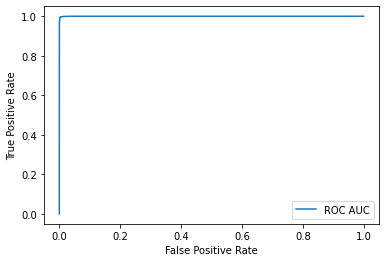

In [21]:
fpr, tpr, _ = roc_curve(fin_ip, fin_op_thresh)
plt.plot(fpr, tpr, label='ROC AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

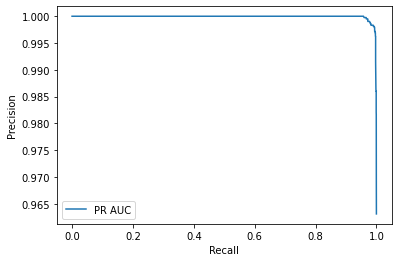

In [22]:
plt.plot(recall, precision, label='PR AUC')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [24]:
with open(str(Path(tr_dir).resolve().parent) + '/fifofot-full.pkl', 'wb') as file:
    pickle.dump([fin_ip, fin_op, fin_op_thresh], file)